# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 FuzzyTM==2.0.5 -q --user

/bin/bash: pip: command not found


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
loan_data_orig = pd.read_csv("/Users/philmcneely/Downloads/School/Phil/Machine Learning/Final Project/Loan_Modelling.csv")   ##  Complete the code to read the data
loan_data = loan_data_orig.copy()
print(f"There are {loan_data.shape[0]} rows and {loan_data.shape[1]} columns in this dataset.")

There are 5000 rows and 14 columns in this dataset.


## Data Overview

In [5]:
pd.concat([loan_data.head(10), loan_data.tail(10)])

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4   1.60          1   
1        2   45          19      34    90089       3   1.50          1   
2        3   39          15      11    94720       1   1.00          1   
3        4   35           9     100    94112       1   2.70          2   
4        5   35           8      45    91330       4   1.00          2   
5        6   37          13      29    92121       4   0.40          2   
6        7   53          27      72    91711       2   1.50          2   
7        8   50          24      22    93943       1   0.30          3   
8        9   35          10      81    90089       3   0.60          2   
9       10   34           9     180    93023       1   8.90          3   
4990  4991   55          25      58    95023       4   2.00          3   
4991  4992   51          25      92    91330       1   1.90          2   
4992  4993   30           5      13    90037       4   0.50          3   
4993  4994   45          21     218    91801       2   6.67          1   
4994  4995   64          40      75    94588       3   2.00          3   
4995  4996   29           3      40    92697       1   1.90          3   
4996  4997   30           4      15    92037       4   0.40          1   
4997  4998   63          39      24    93023       2   0.30          3   
4998  4999   65          40      49    90034       3   0.50          2   
4999  5000   28           4      83    92612       3   0.80          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
5          155              0                   0           0       1   
6            0              0                   0           0       1   
7            0              0                   0           0       0   
8          104              0                   0           0       1   
9            0              1                   0           0       0   
4990       219              0                   0           0       0   
4991       100              0                   0           0       0   
4992         0              0                   0           0       0   
4993         0              0                   0           0       1   
4994         0              0                   0           0       1   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
5              0  
6              0  
7              1  
8              0  
9              0  
4990           1  
4991           1  
4992           0  
4993           0  
4994           0  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [6]:
loan_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
#lets make names consistent to avoid confusion later, and lowercase so we dont have to worry about caps
loan_data.columns = loan_data.columns.str.lower()
loan_data.columns = loan_data.columns.str.replace("creditcard", "credit_card")
loan_data.columns

Index(['id', 'age', 'experience', 'income', 'zipcode', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'credit_card'],
      dtype='object')

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zipcode             5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  credit_card         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
#Lets look at a sample of data
loan_data.sample(10)

id  age  experience  income  zipcode  family  ccavg  education  \
2242  2243   41          17      45    93437       1   1.80          1   
509    510   52          28     118    90503       2   6.80          1   
3384  3385   36          11     162    94583       1   8.60          1   
3510  3511   38          11      69    92124       3   2.33          2   
2583  2584   37          11      71    91302       1   2.50          1   
4641  4642   36          11      31    94022       4   1.70          1   
2253  2254   59          35      25    95827       2   0.30          1   
1734  1735   35          10      79    94720       4   2.10          3   
3378  3379   25           0      44    94536       4   0.60          2   
3274  3275   31           5     110    92123       2   1.50          3   

      mortgage  personal_loan  securities_account  cd_account  online  \
2242       172              0                   1           0       1   
509        112              0                   0           0       1   
3384       153              0                   1           0       1   
3510         0              0                   0           0       0   
2583       185              0                   0           0       1   
4641       124              0                   0           0       1   
2253        75              0                   0           0       1   
1734       182              0                   0           0       1   
3378         0              0                   0           0       0   
3274         0              0                   0           0       1   

      credit_card  
2242            0  
509             0  
3384            0  
3510            0  
2583            1  
4641            1  
2253            0  
1734            0  
3378            1  
3274            0

In [10]:
#summarize
loan_data.describe(include='all').T

count          mean          std      min       25%  \
id                  5000.0   2500.500000  1443.520003      1.0   1250.75   
age                 5000.0     45.338400    11.463166     23.0     35.00   
experience          5000.0     20.104600    11.467954     -3.0     10.00   
income              5000.0     73.774200    46.033729      8.0     39.00   
zipcode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
family              5000.0      2.396400     1.147663      1.0      1.00   
ccavg               5000.0      1.937938     1.747659      0.0      0.70   
education           5000.0      1.881000     0.839869      1.0      1.00   
mortgage            5000.0     56.498800   101.713802      0.0      0.00   
personal_loan       5000.0      0.096000     0.294621      0.0      0.00   
securities_account  5000.0      0.104400     0.305809      0.0      0.00   
cd_account          5000.0      0.060400     0.238250      0.0      0.00   
online              5000.0      0.596800     0.490589      0.0      0.00   
credit_card         5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
id                   2500.5   3750.25   5000.0  
age                    45.0     55.00     67.0  
experience             20.0     30.00     43.0  
income                 64.0     98.00    224.0  
zipcode             93437.0  94608.00  96651.0  
family                  2.0      3.00      4.0  
ccavg                   1.5      2.50     10.0  
education               2.0      3.00      3.0  
mortgage                0.0    101.00    635.0  
personal_loan           0.0      0.00      1.0  
securities_account      0.0      0.00      1.0  
cd_account              0.0      0.00      1.0  
online                  1.0      1.00      1.0  
credit_card             0.0      1.00      1.0

In [11]:
#negative values in experience, how many??
print(f'There are {len(loan_data[loan_data["experience"] < 0])} rows with a negative value')

There are 52 rows with a negative value


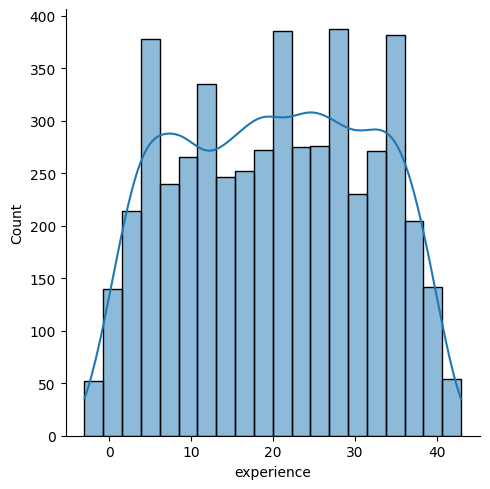

In [12]:
#distribution?
sns.displot(x=loan_data["experience"], kde=True)

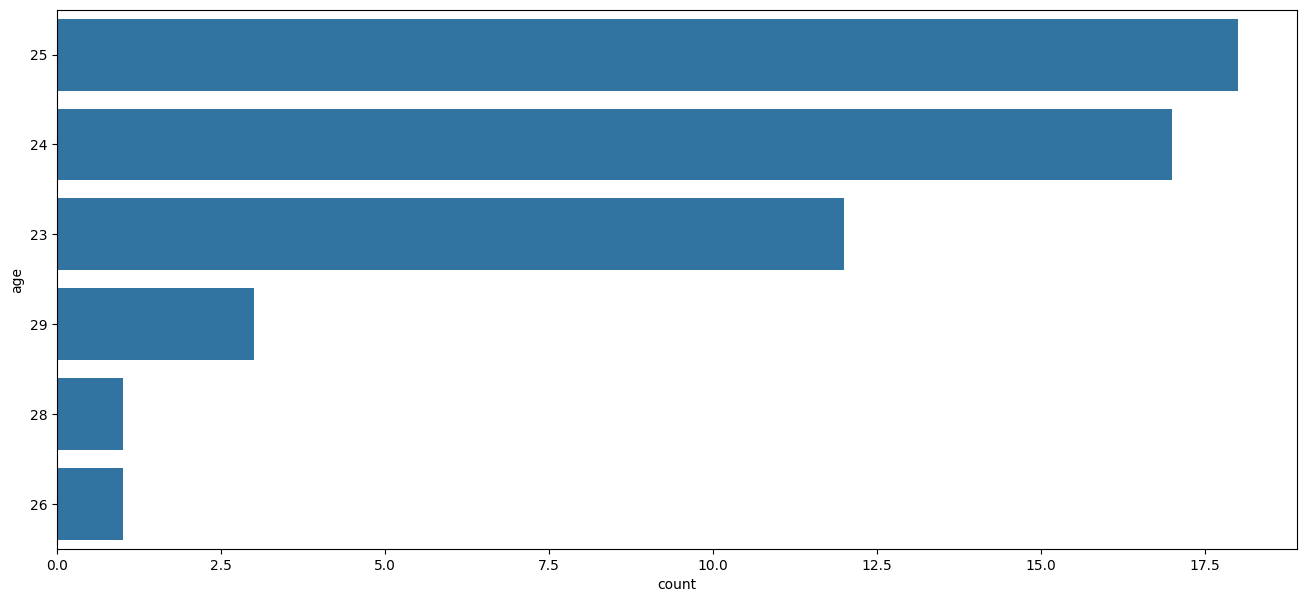

In [13]:
plt.figure(figsize=(16, 7))
sns.countplot(y=loan_data[loan_data.experience<0]['age'], 
              data=loan_data, 
              order=loan_data[loan_data.experience<0]['age'].value_counts().index[:]);

obs

In [14]:
# we could replace all the negative values with median, but maybe its just a mistake. We will instead create absolute value (remove the negative) column and use that going forward.
loan_data['experience'] = np.abs(loan_data.experience)
loan_data.sort_values(by='experience', ascending=True).head(10)

id  age  experience  income  zipcode  family  ccavg  education  \
2756  2757   27           0      40    91301       4    1.0          3   
2009  2010   25           0      99    92735       1    1.9          1   
4393  4394   24           0      59    95521       4    1.6          1   
347    348   25           0      43    94305       2    1.6          3   
4425  4426   26           0     164    95973       2    4.0          3   
1847  1848   25           0      52    95126       3    2.6          3   
1765  1766   26           0     149    95051       2    7.2          1   
363    364   25           0      30    92691       2    1.7          2   
1732  1733   25           0      88    94566       2    1.8          2   
3908  3909   24           0      44    90638       3    0.1          2   

      mortgage  personal_loan  securities_account  cd_account  online  \
2756         0              0                   0           0       1   
2009       323              0                   0           0       0   
4393         0              0                   0           0       0   
347          0              0                   1           1       1   
4425       301              1                   0           0       1   
1847       159              0                   0           0       0   
1765       154              0                   0           0       0   
363          0              0                   0           0       0   
1732       319              0                   0           0       1   
3908         0              0                   0           0       0   

      credit_card  
2756            0  
2009            0  
4393            0  
347             1  
4425            0  
1847            0  
1765            0  
363             0  
1732            1  
3908            0

In [15]:
#any missing data?
loan_data.isnull().sum()

id                    0
age                   0
experience            0
income                0
zipcode               0
family                0
ccavg                 0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
credit_card           0
dtype: int64

In [16]:
#any duplicates?
loan_data.duplicated().sum()

0

No nulls or missing data

In [17]:
#unique vals?
loan_data.nunique()

id                    5000
age                     45
experience              44
income                 162
zipcode                467
family                   4
ccavg                  108
education                3
mortgage               347
personal_loan            2
securities_account       2
cd_account               2
online                   2
credit_card              2
dtype: int64

id has a unique value for each row, this won't contribute to any model.  Delete.<br>
zipcode has 467 unique values and unless we find a correlation between income or one of the other financial columns and it, it may not be useful.

In [18]:
loan_data.drop(['id'], axis=1, inplace=True)

In [19]:
#check id column is removed
loan_data.head()

age  experience  income  zipcode  family  ccavg  education  mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   personal_loan  securities_account  cd_account  online  credit_card  
0              0                   1           0       0            0  
1              0                   1           0       0            0  
2              0                   0           0       0            0  
3              0                   0           0       0            0  
4              0                   0           0       0            1

In [20]:
#summarize again
loan_data.describe(include='all').T

count          mean          std      min      25%  \
age                 5000.0     45.338400    11.463166     23.0     35.0   
experience          5000.0     20.134600    11.415189      0.0     10.0   
income              5000.0     73.774200    46.033729      8.0     39.0   
zipcode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
family              5000.0      2.396400     1.147663      1.0      1.0   
ccavg               5000.0      1.937938     1.747659      0.0      0.7   
education           5000.0      1.881000     0.839869      1.0      1.0   
mortgage            5000.0     56.498800   101.713802      0.0      0.0   
personal_loan       5000.0      0.096000     0.294621      0.0      0.0   
securities_account  5000.0      0.104400     0.305809      0.0      0.0   
cd_account          5000.0      0.060400     0.238250      0.0      0.0   
online              5000.0      0.596800     0.490589      0.0      0.0   
credit_card         5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
age                    45.0     55.0     67.0  
experience             20.0     30.0     43.0  
income                 64.0     98.0    224.0  
zipcode             93437.0  94608.0  96651.0  
family                  2.0      3.0      4.0  
ccavg                   1.5      2.5     10.0  
education               2.0      3.0      3.0  
mortgage                0.0    101.0    635.0  
personal_loan           0.0      0.0      1.0  
securities_account      0.0      0.0      1.0  
cd_account              0.0      0.0      1.0  
online                  1.0      1.0      1.0  
credit_card             0.0      1.0      1.0

#### Observations:

* There are 5000 records in this dataset.
* All values were of a numerical type (int, float). I considered converting family, education, personal_loan, securites_account, cd_account, online and credit_card to categories, but have not done so yet.
* There are no missing values in any columns
* There are only 2 unique values in the personal_loan, securities_account, cd_account, online and credit_card columns. (see above)
* age has a mean of 45 and a standard deviation of about 11.4. The min age is 23 and the max is 67.
* experience has a mean of 20 and a standard deviation of 11.5. The min is now 0 and the max is 43 years.  Since experience shouldnt be possible to be negative, I updated it to the absolute value to remove negative values.
* income has a mean of 74K and a standard deviation of 46K. The values range from 8K to 224K.
* ccavg has a mean of 1.93 and a standard deviation of 1.7. The values range from 0.0 to 10.0.
* mortgage has a mean of 56.5K and a standard deviation of 101K. The standard deviation is greater than the mean.

## Exploratory Data Analysis.

### Univariate analysis

#### Visualizing the numerical data

The summary shows that age, experience, income, ccavg and mortgage are numerical and continous in nature, thus we will plot the histogram & boxplot for each of these variables

In [21]:
def combined_histogram_boxplot(data, feature, figsize=(16, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [22]:
def show_outliers(feature: str, data=loan_data):
    """ 
    Returns dataframe object of feature outliers.
    feature: 1-d feature array
    data: pandas dataframe (default is df)
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    #print(((df.Mileage < (Q1 - 1.5 * IQR)) | (df.Mileage > (Q3 + 1.5 * IQR))).sum())
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

### Observations on age

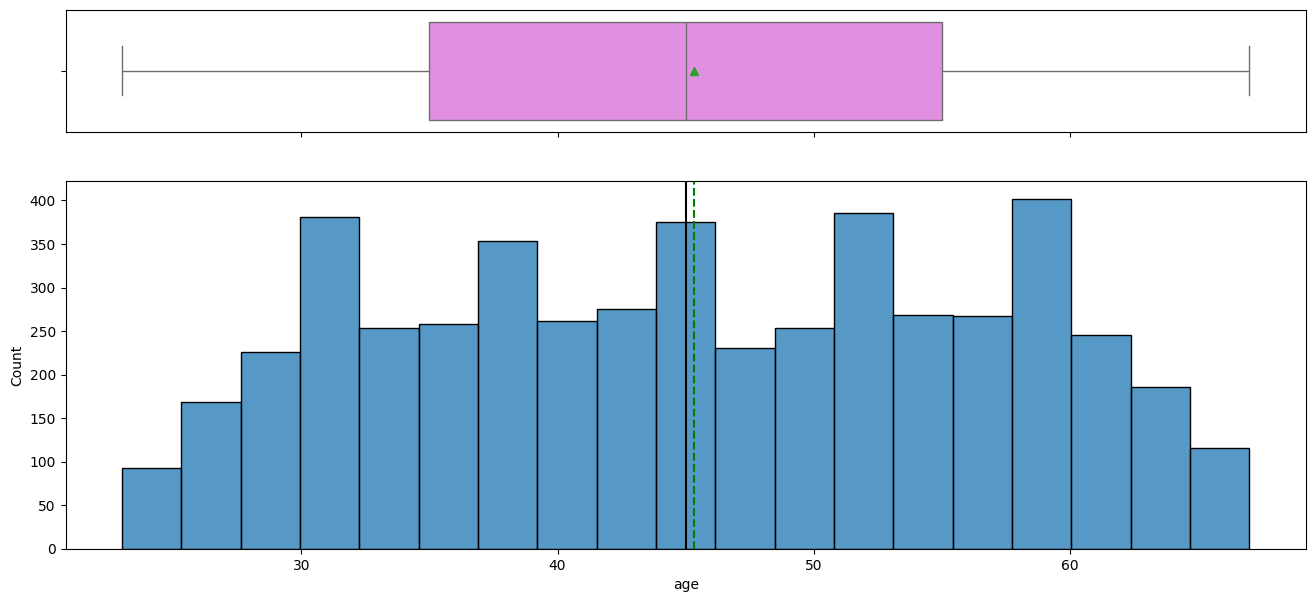

In [23]:
combined_histogram_boxplot(loan_data, 'age')

#### Observations <br>
* No outliers in the age column. The mean is very near to the median.
* Average age is about 45 years old.
* The age column distribution is uniform.

### Observations on experience

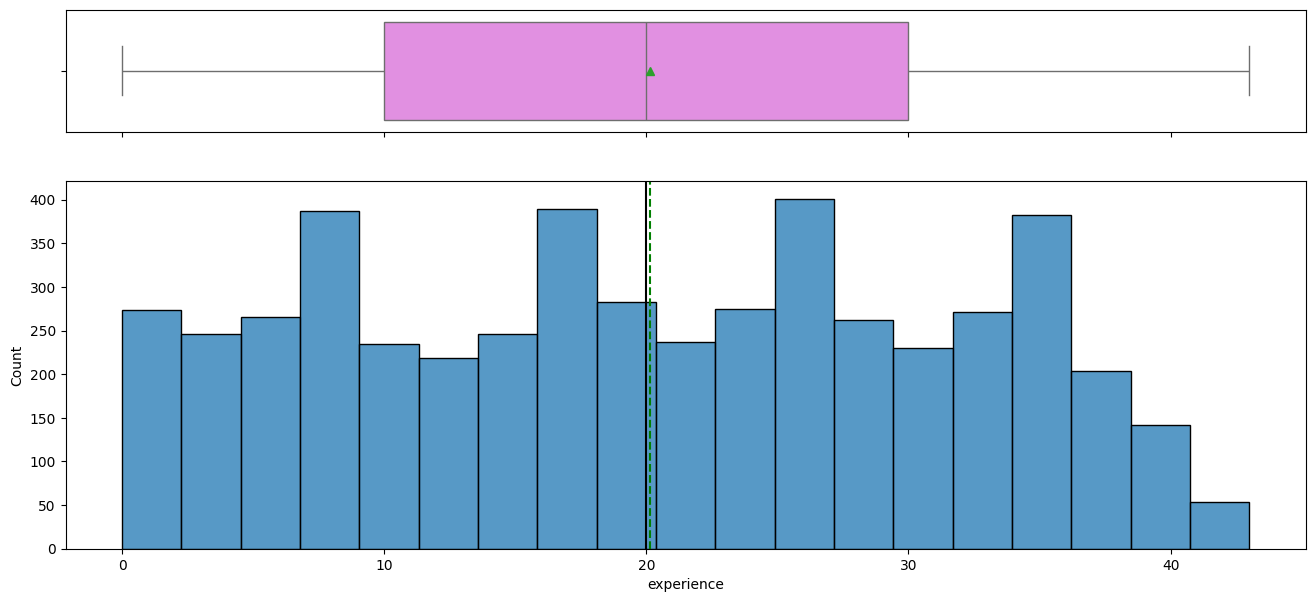

In [24]:
combined_histogram_boxplot(loan_data, 'experience')

#### Observations <br>
* The experience column has no outliers.
* The average and median experience is about 20 years.
* The experience column is uniformly distributed.
* The mean is close to the median.

### Observations on income

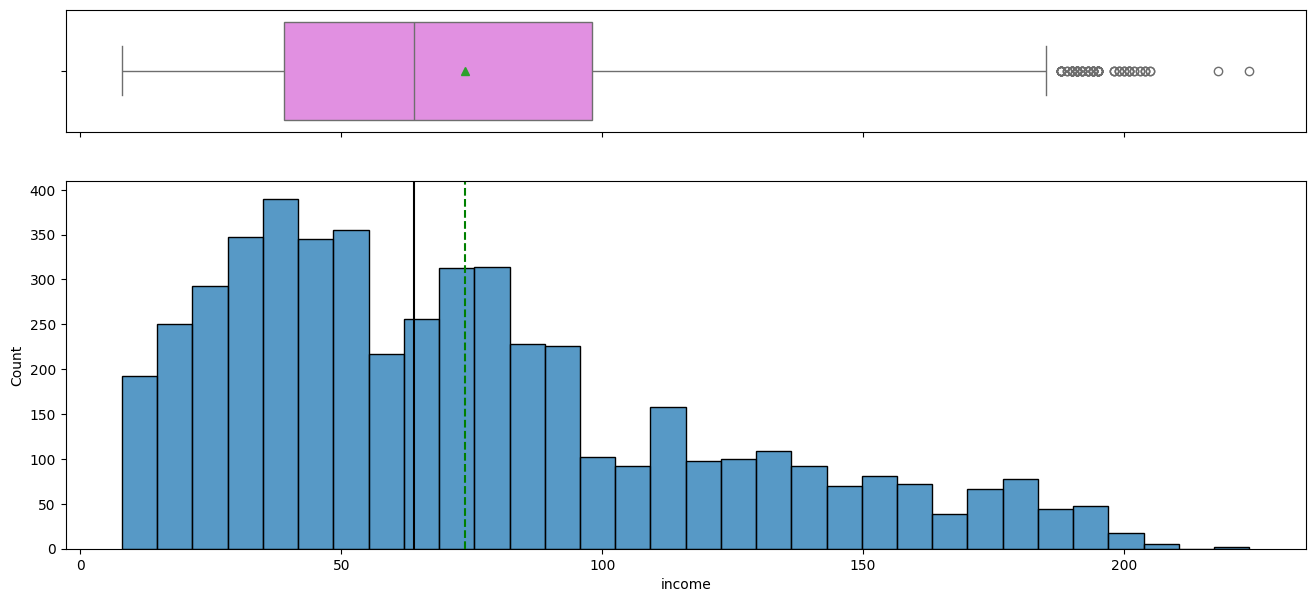

In [25]:
combined_histogram_boxplot(loan_data, 'income')

#### Observations <br>
* The average income is about 60K, with a median value of about 70K.
* The income column is right skewed and has many outliers.

In [26]:
#what do these outliers look like, and how many?
outliers = show_outliers('income')
outliers.sort_values(by='income', ascending=False).head(10)

age  experience  income  zipcode  family  ccavg  education  mortgage  \
3896   48          24     224    93940       2   6.67          1         0   
4993   45          21     218    91801       2   6.67          1         0   
526    26           2     205    93106       1   6.33          1       271   
2988   46          21     205    95762       2   8.80          1       181   
4225   43          18     204    91902       2   8.80          1         0   
677    46          21     204    92780       2   2.80          1         0   
2278   30           4     204    91107       2   4.50          1         0   
3804   47          22     203    95842       2   8.80          1         0   
2101   35           5     203    95032       1  10.00          3         0   
787    45          15     202    91380       3  10.00          3         0   

      personal_loan  securities_account  cd_account  online  credit_card  
3896              0                   0           1       1            1  
4993              0                   0           0       1            0  
526               0                   0           0       0            1  
2988              0                   1           0       1            0  
4225              0                   0           0       1            0  
677               0                   0           0       1            0  
2278              0                   0           0       1            0  
3804              0                   0           0       1            0  
2101              1                   0           0       0            0  
787               1                   0           0       0            0

In [27]:
print(f"There are {outliers.shape[0]} outliers in this column.")

There are 96 outliers in this column.


### Observations on ccavg

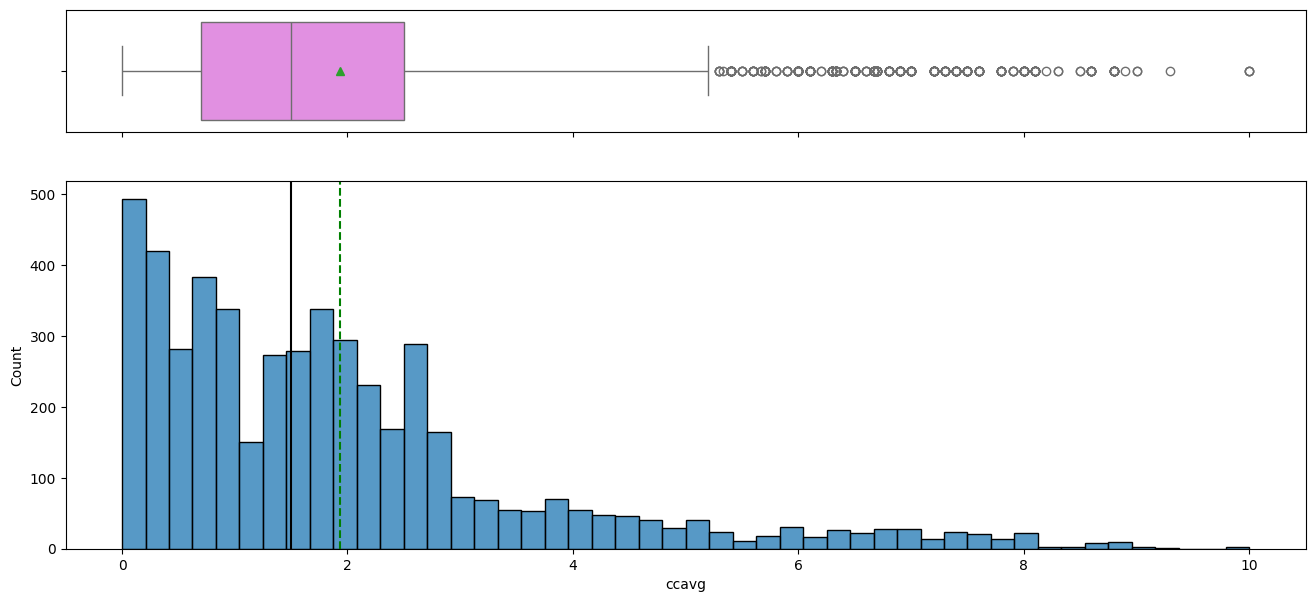

In [28]:
combined_histogram_boxplot(loan_data, 'ccavg')

#### Observations <br>
* The ccavg column is right skewed and has many outliers.

In [29]:
#what do these outliers look like, and how many?
outliers = show_outliers('ccavg')
outliers.sort_values(by='ccavg', ascending=False).head(10)

age  experience  income  zipcode  family  ccavg  education  mortgage  \
2337   43          16     201    95054       1   10.0          2         0   
787    45          15     202    91380       3   10.0          3         0   
2101   35           5     203    95032       1   10.0          3         0   
3943   61          36     188    91360       1    9.3          2         0   
3822   63          33     178    91768       4    9.0          3         0   
1339   52          25     180    94545       2    9.0          2       297   
9      34           9     180    93023       1    8.9          3         0   
1277   45          20     194    92110       2    8.8          1       428   
3312   47          22     190    94550       2    8.8          1         0   
4225   43          18     204    91902       2    8.8          1         0   

      personal_loan  securities_account  cd_account  online  credit_card  
2337              1                   0           0       0            1  
787               1                   0           0       0            0  
2101              1                   0           0       0            0  
3943              1                   0           0       0            0  
3822              1                   0           0       0            0  
1339              1                   0           0       1            0  
9                 1                   0           0       0            0  
1277              0                   0           0       0            0  
3312              0                   0           0       0            0  
4225              0                   0           0       1            0

In [30]:
print(f"There are {outliers.shape[0]} outliers in this column.")

There are 324 outliers in this column.


### Observations on mortgage

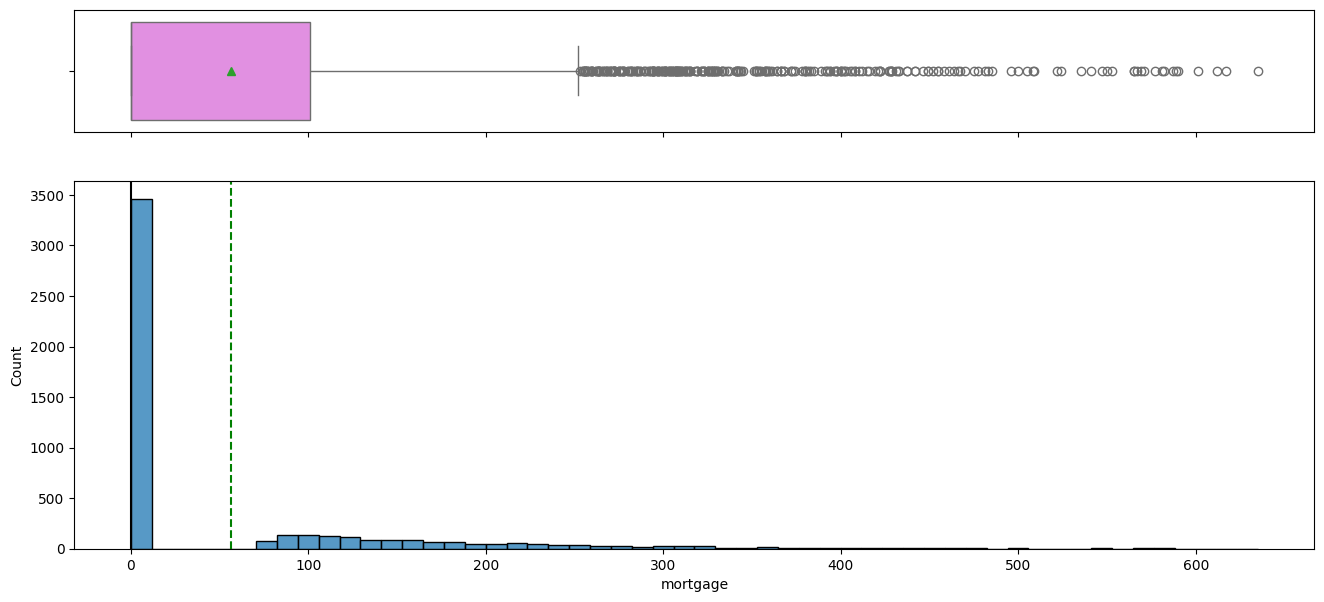

In [31]:
combined_histogram_boxplot(loan_data, 'mortgage')

#### Observations <br>
* The mortgage column has many values that are equal to zero.
* The mortgage column has many outliers.

In [32]:
#what do these outliers look like, and how many?
outliers = show_outliers('mortgage')
outliers.sort_values(by='mortgage', ascending=False).head(10)

age  experience  income  zipcode  family  ccavg  education  mortgage  \
2934   37          13     195    91763       2    6.5          1       635   
303    49          25     195    95605       4    3.0          1       617   
4812   29           4     184    92126       4    2.2          3       612   
1783   53          27     192    94720       1    1.7          1       601   
4842   49          23     174    95449       3    4.6          2       590   
1937   51          25     181    95051       1    3.3          3       589   
782    54          30     194    92056       3    6.0          3       587   
2769   33           9     183    91320       2    8.8          3       582   
4655   33           7     188    95054       2    7.0          2       581   
4345   26           1     184    94608       2    4.2          3       577   

      personal_loan  securities_account  cd_account  online  credit_card  
2934              0                   0           0       1            0  
303               1                   0           0       0            0  
4812              1                   0           0       1            0  
1783              0                   0           0       1            0  
4842              1                   0           0       0            0  
1937              1                   1           1       1            0  
782               1                   1           1       1            1  
2769              1                   0           0       1            0  
4655              1                   0           0       0            0  
4345              1                   0           1       1            1

In [33]:
print(f"There are {outliers.shape[0]} outliers in this column.")

There are 291 outliers in this column.


In [34]:
print(f'There are {loan_data[loan_data.mortgage==0].shape[0]} rows where mortgage is 0')

There are 3462 rows where mortgage is 0


That is a lot of rows with effectively no mortgage data.  This column is likely not very useful for this model.

#### Visualizing the categorical data

The summary shows that zipcode, family, education, personal_loan, cd_account, online and credit_card are categorical in nature, thus we will plot a labelled barplot for each of these variables

In [35]:
def labeled_barplot_percentage(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observation on zipcode

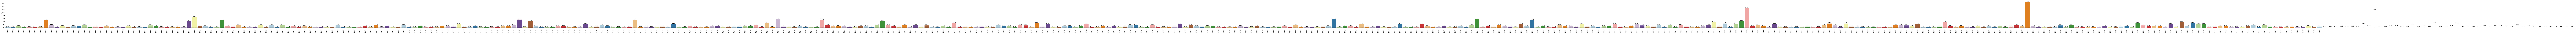

In [36]:
labeled_barplot_percentage(loan_data, 'zipcode',perc=True)

#### Observations <br>
* zipcode shows no discernable patterns.

### Observations on family

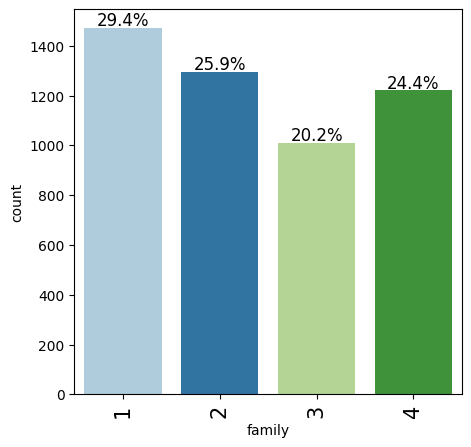

In [37]:
labeled_barplot_percentage(loan_data, 'family',perc=True)

#### Observations <br>
* The largest grouping of the family column is 1 with a percentage of 29.4%.
* The second largest grouping is a size of 2, then 4.
* A family size of 3 is the smallest grouping in our data.

### Observations on education

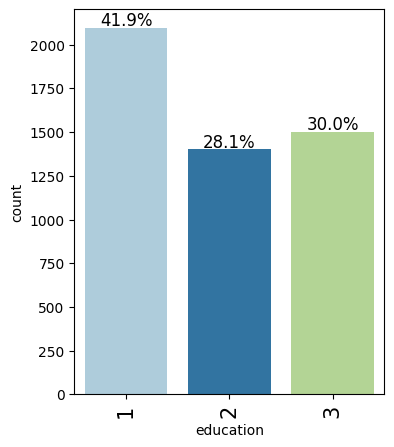

In [38]:
labeled_barplot_percentage(loan_data, 'education',perc=True)

#### Observations <br>
* Grouping 1 (undergrad) is the highest with 41.9%.
* Grouping 3 is the second highest with 30%.
* Grouping 2 is the third highest proportion with 28.1%.

### Observations on personal_loan

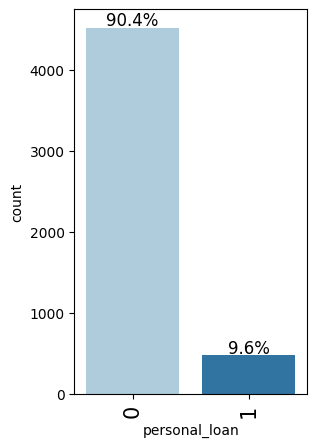

In [39]:
labeled_barplot_percentage(loan_data, 'personal_loan',perc=True)

#### Observations <br>
* Customers that didn't accept a personal_loan from the last campaign are the greatest percentage with 90.4%.
* Customers that did accept a personal_loan from the last campaign are 9.6%.

### Observations on credit_card

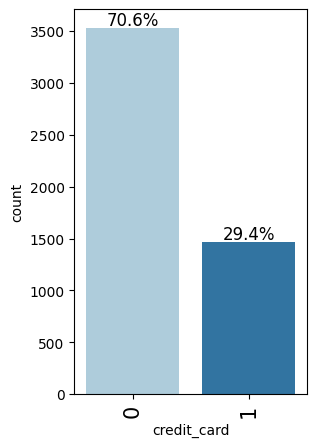

In [40]:
labeled_barplot_percentage(loan_data,'credit_card',perc=True)

#### Observations <br>
* Customers that don't use a credit_card issued by other banks make up the majority with 70.6%.
* Customers that do use a credit_card issued by other banks are 29.4%.

### Observations on online

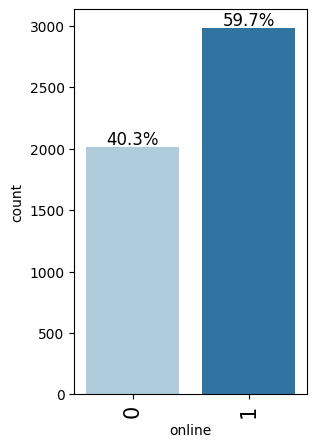

In [41]:
labeled_barplot_percentage(loan_data,'online',perc=True)

#### Observations <br>
* Customers that use online banking make up the majority with 59.7%.
* Customers that do not use online banking are 40.3%.

### Observations on cd_account

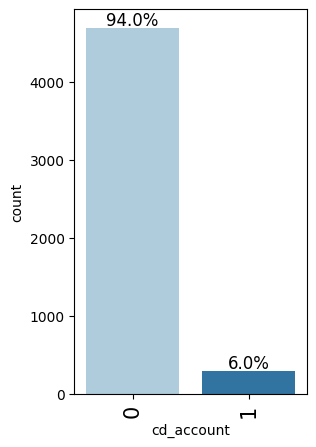

In [42]:
labeled_barplot_percentage(loan_data,'cd_account',perc=True)

#### Observations <br>
* Customers without a cd_account make up the greatest percentage with 94%
* Customers with a cd_account are 6%

### Observations on securities_account

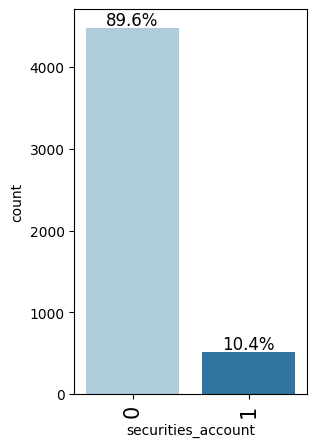

In [43]:
labeled_barplot_percentage(loan_data,'securities_account',perc=True)

#### Observations <br>
* Customers without a securities_account make up the greatest proportion with 89.6%.
* Customers with a securities_account are 10.4%.

### Bivariate Analysis

#### Correlation and heatmap

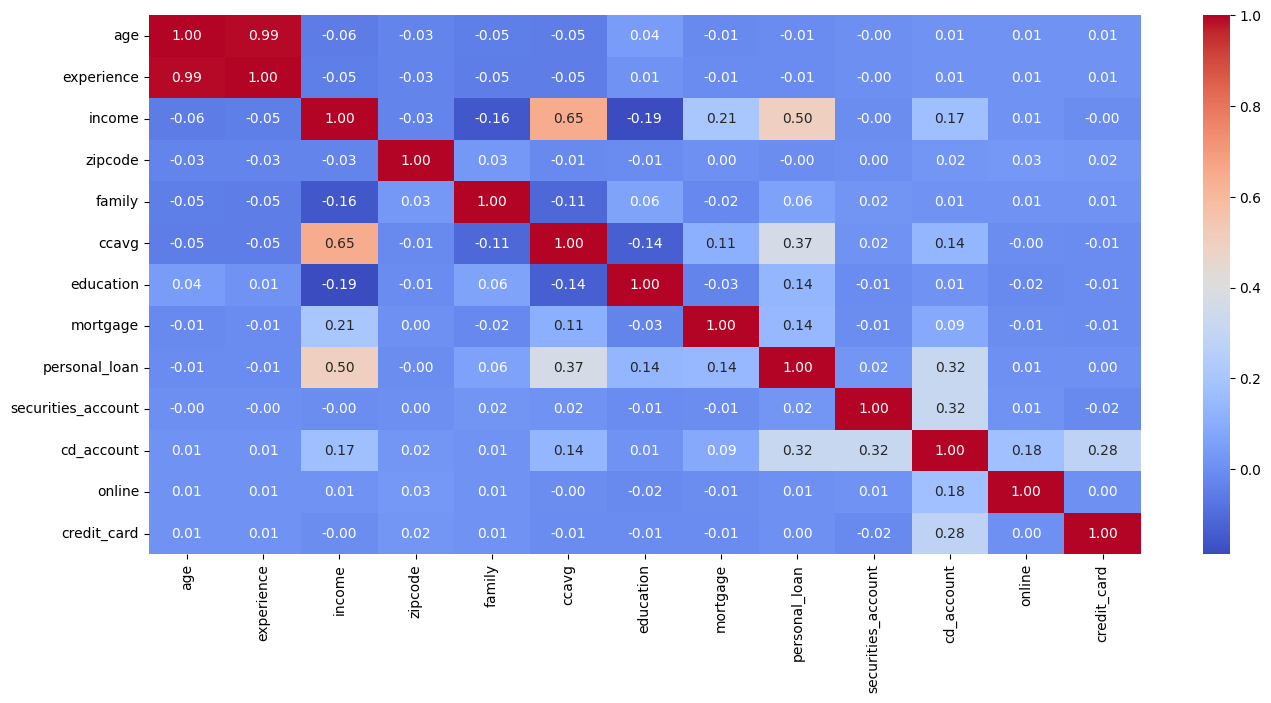

In [44]:
plt.figure(figsize=(16, 7))
sns.heatmap(loan_data.corr(), annot=True, fmt=".2f", cmap="coolwarm");

#### Observations <br>
* age and experience are heavily positively correlated.
* ccavg and income are positively correlated at 0.65
* several other data points are positively correlated at much lower values.

#### Pairplot

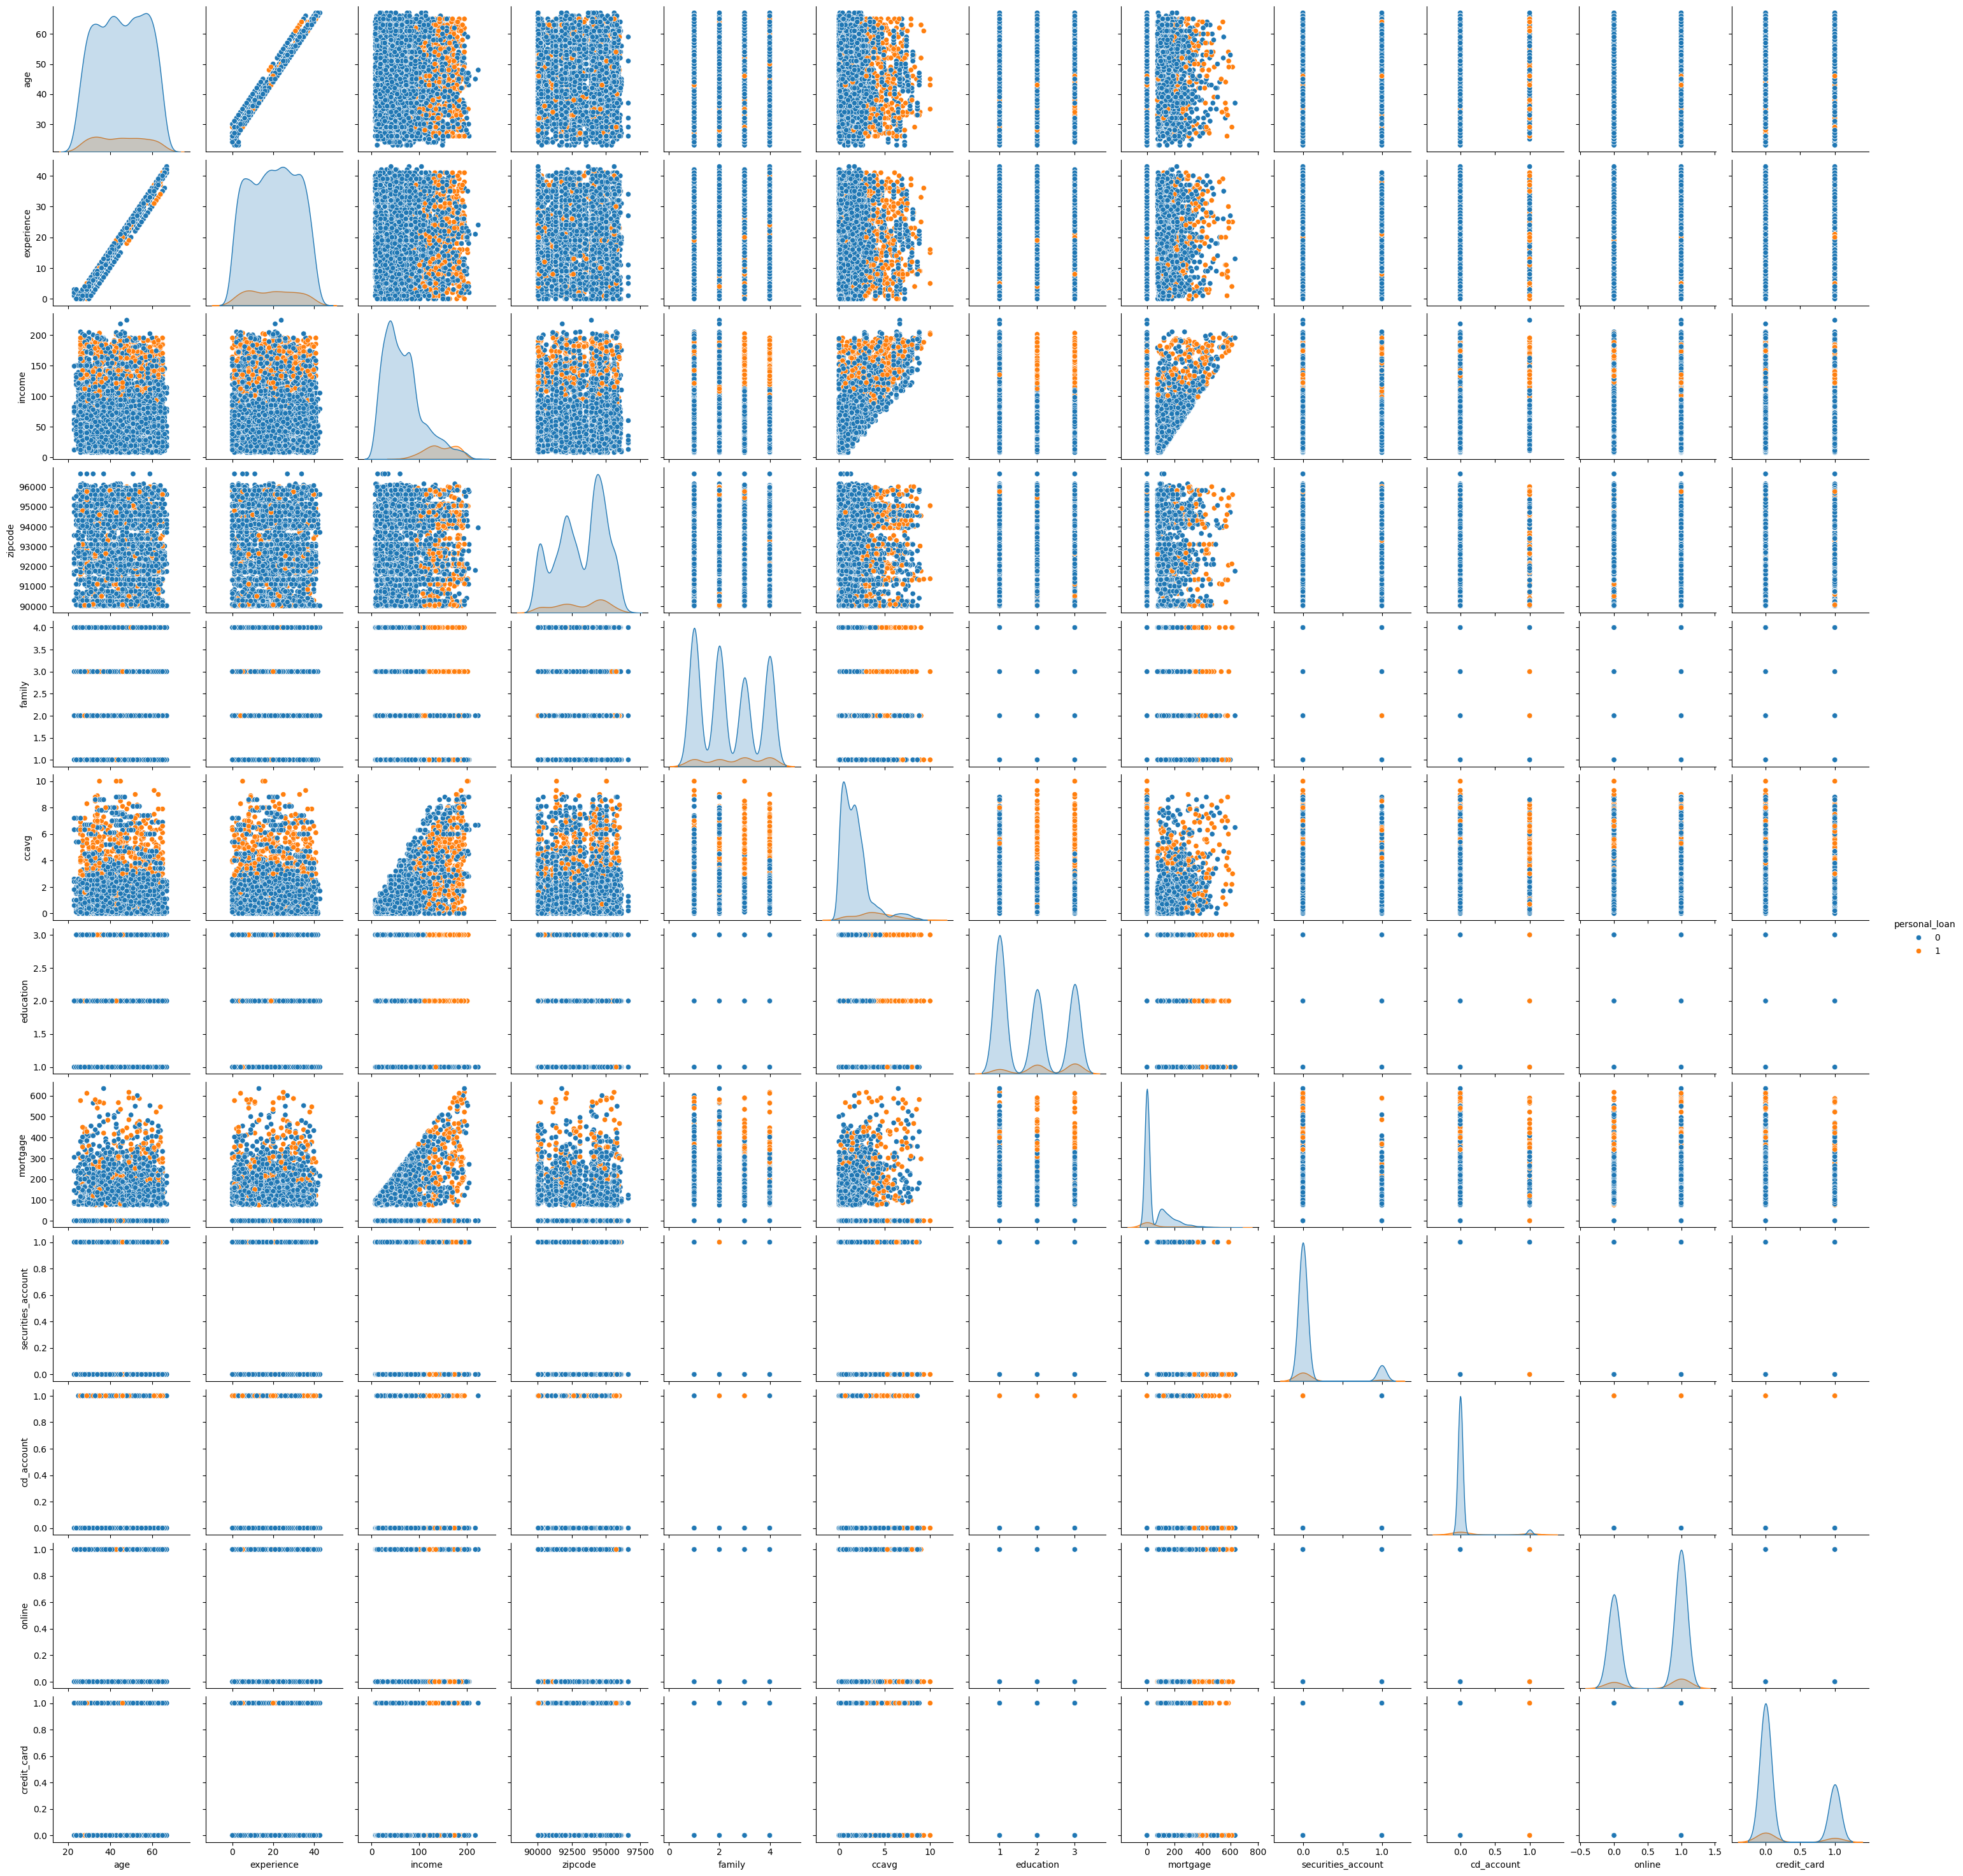

In [44]:
#lets check correlation with a pairplot
sns.pairplot(data=loan_data, hue='personal_loan');

#### Observations:

* The orange points represent the customers who accepted a personal_loan in the last campaign and the blue points are the ones who did not.
* The univariate analysis of the personal_loan dataset showed that only 9.6% of the customers accepted the personal loan.  This is consistant with the pairplot above.
* It is observed that there is a slight correlation between income and ccavg.
* There is a very strong corelation between age and experience.
* Customers who accepted a personal loan are distributed close to uniformly throughout the different pairplots.  Unlikely zipcode will contribute much to the model.
* Customers who accepted a personal loan are highly distributed in the following groupings:
    * customers with family of size 3 or 4
    * customers with cd_accounts
    * customers who use credit_card issued from other banks
    * customers with education 2 or 3
    * customers with income >= 100K
    * customers with ccavg >= 3K
    * customers with mortgage >= 300K<br>
Thus, these variables should contribute to any model we construct.

### Observing the variables effect on personal loan

#### Plot personal_loan vs distribution of categorical variables

We will plot the personal_loan vs distribution of the variables to gain insight to the data

In [45]:
def create_stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### personal_loan vs. family

personal_loan     0    1   All
family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


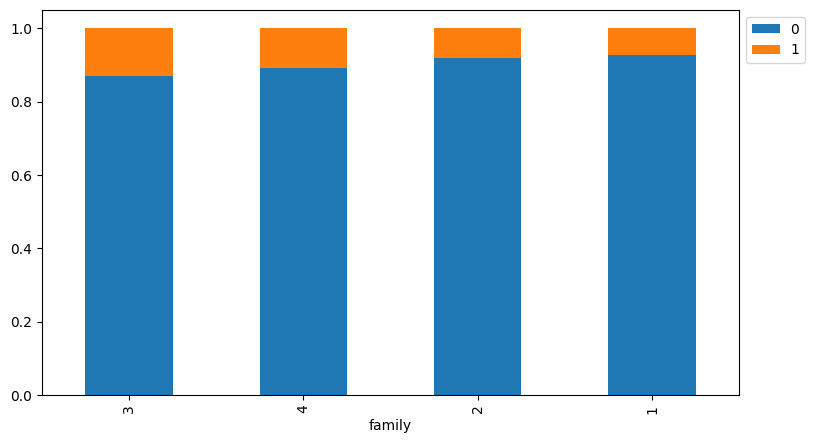

In [46]:
create_stacked_barplot(loan_data, "family", "personal_loan")

#### Observations <br>
* A Family of size 3 or 4 have accepted a personal loan at a higher rate.
* One conclusion could be that as familly size grows, customers are more willing to accept personal loans.

### personal_loan vs. education

personal_loan     0    1   All
education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


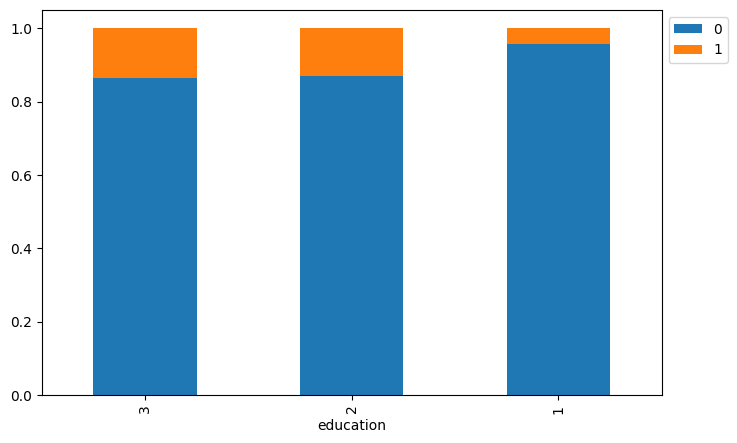

In [47]:
create_stacked_barplot(loan_data, "education", "personal_loan")

#### Observations <br>
* Customers with education level 2 and 3 have accepted a personal loan more than education level 1.
* Education level 3 accepted at the highest rate.
* As education increases, personal loan acceptance increases.

### personal_loan vs securities_account

personal_loan          0    1   All
securities_account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


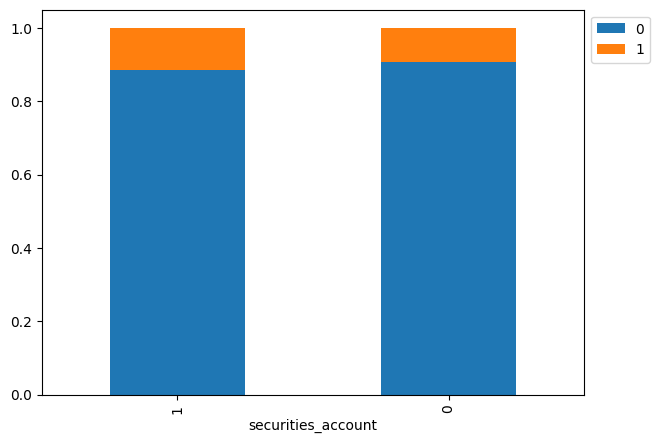

In [48]:
create_stacked_barplot(loan_data, "securities_account", "personal_loan")

#### Observations <br>
* Customers with a security account are more willing to accept a personal loan.

### personal_loan vs cd_account

personal_loan     0    1   All
cd_account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


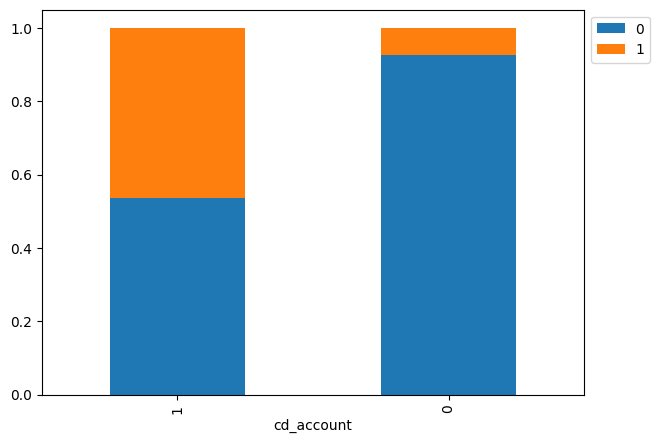

In [49]:
create_stacked_barplot(loan_data, "cd_account", "personal_loan")

#### Observations <br>
* Customers with a CD_account are more willing to accept a personal loan.

### personal_loan vs online

personal_loan     0    1   All
online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


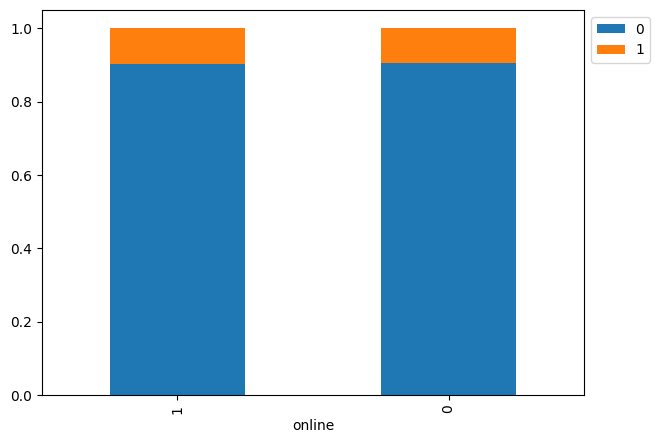

In [50]:
create_stacked_barplot(loan_data, "online", "personal_loan")

#### Observations <br>
* Customers who use internet banking services and who do not use internet banking services are close to equally likely to accept personal loans.

### personal_loan vs credit_card

personal_loan     0    1   All
credit_card                   
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


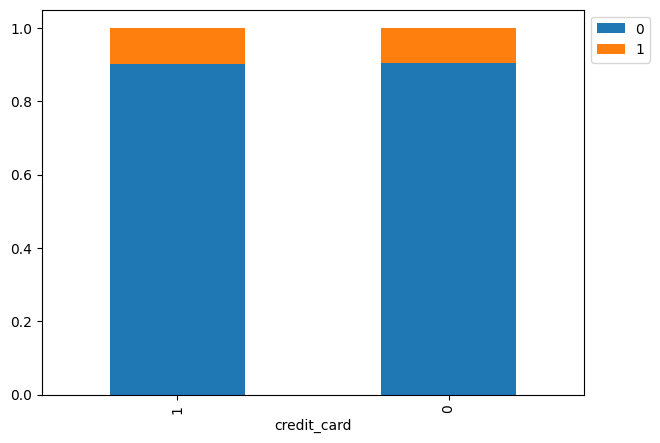

In [51]:
create_stacked_barplot(loan_data, "credit_card", "personal_loan")

#### Observations <br>
* Customers who use credit cards issued by other banks and those who do not are close to equally likely to accept personal loans

### personal_loan vs zipcode

personal_loan     0    1   All
zipcode                       
All            4520  480  5000
94720           150   19   169
94305           114   13   127
92093            42    9    51
90095            63    8    71
...             ...  ...   ...
92866             8    0     8
92843             3    0     3
92835             3    0     3
92833             4    0     4
90005             5    0     5

[468 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


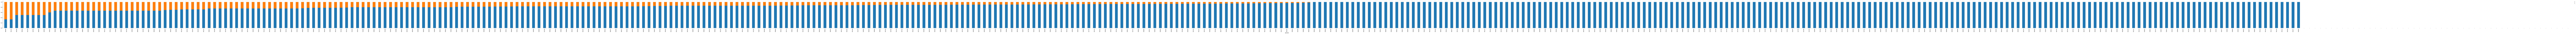

In [52]:
create_stacked_barplot(loan_data, "zipcode", "personal_loan")

#### Observations <br>
* There is no real significant correlation between zipcode and personal_loan. This column should be removed from our dataset.

#### Plot personal_loan vs distribution of numerical variables

We will plot the personal_loan vs distribution of the variables to gain insight to the data

In [53]:
def create_distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### personal_loan vs. age

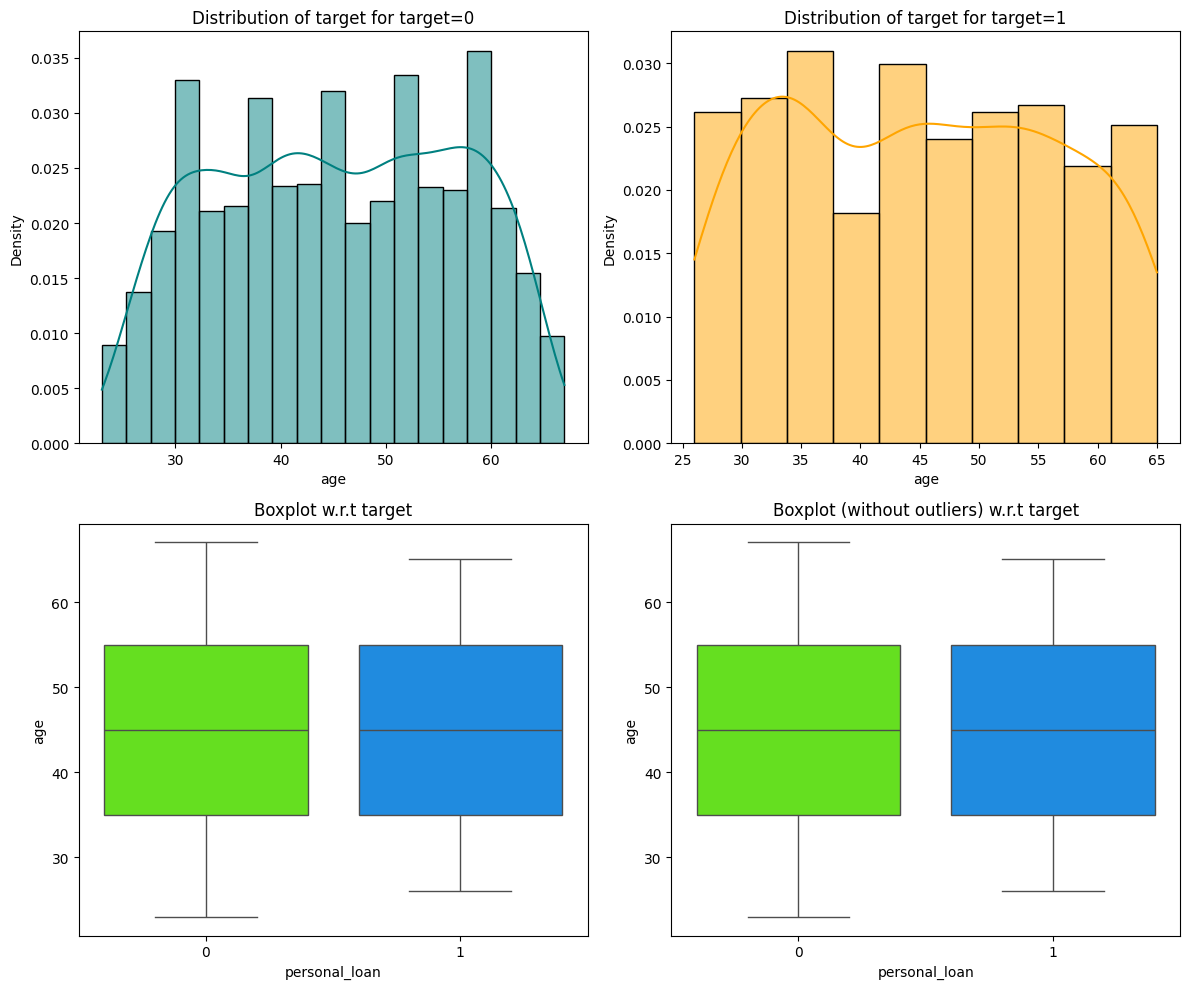

In [54]:
create_distribution_plot_wrt_target(loan_data, "age", "personal_loan")

#### Observations <br>
* The mean age for customers accepting and not accepting personal loans is very close to 45 years.
* Age does not have a relation with personal loan, thus not useful for predicting if a customer will accept a personal loan.

### personal_loan vs experience

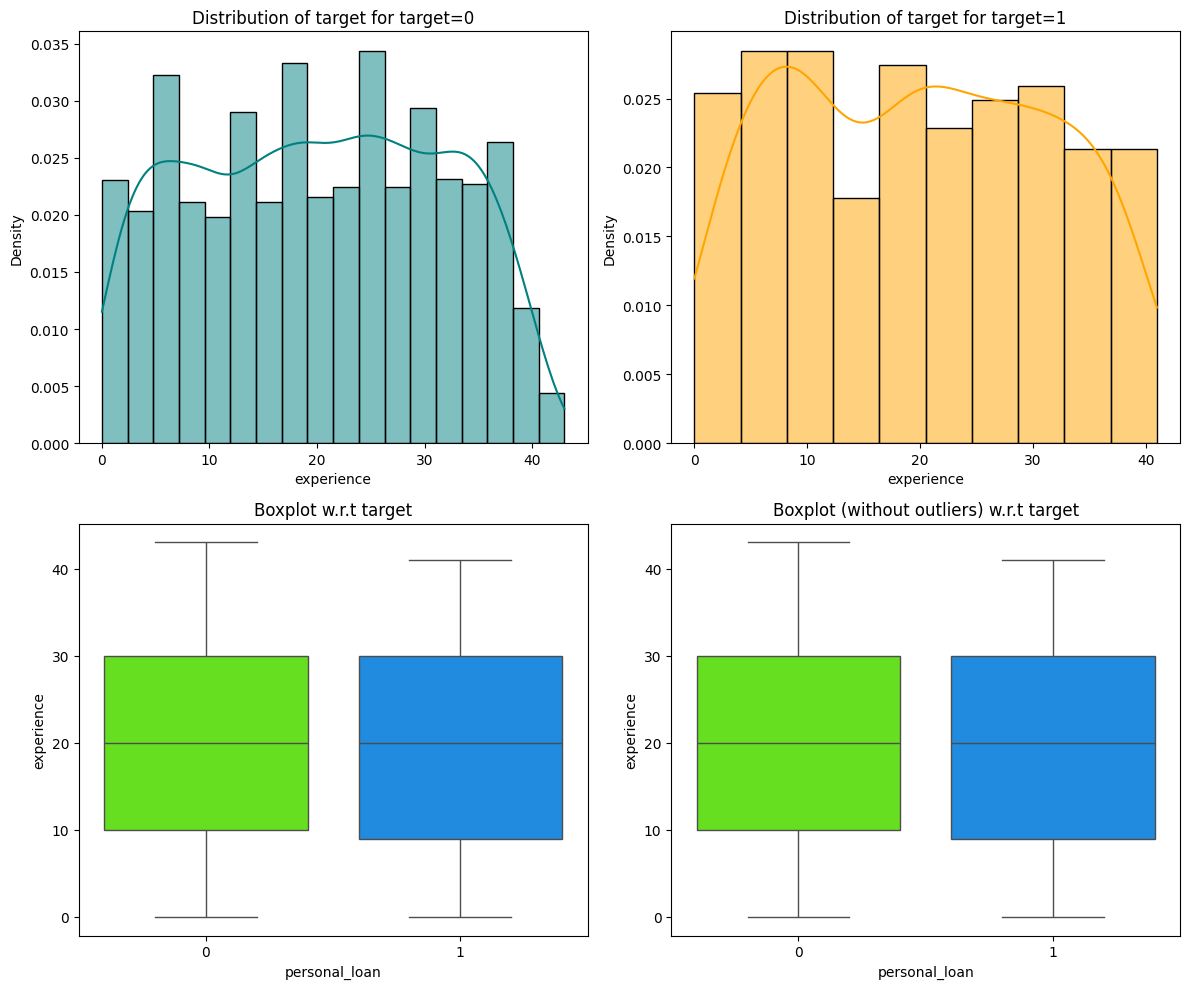

In [55]:
create_distribution_plot_wrt_target(loan_data, "experience", "personal_loan")

#### Observations <br>
* The mean Experience for customers accepting and not accepting personal loans is very close to 20 years
* Experience does not have a relation with personal loan, thus not useful for predicting if a customer will accept a personal loan.

### personal_loan vs income

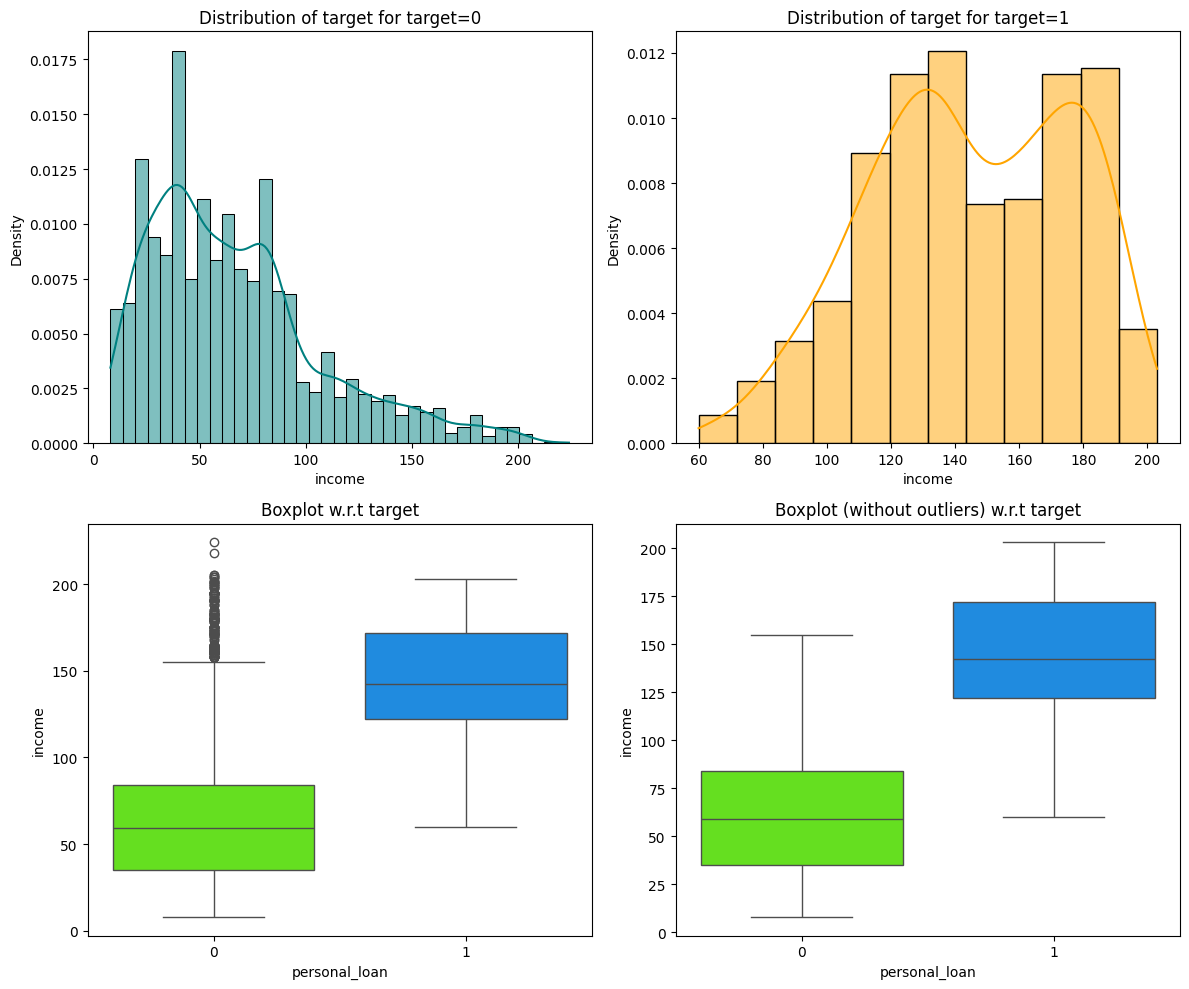

In [56]:
create_distribution_plot_wrt_target(loan_data, "income", "personal_loan")

#### Observations <br>
* Income varies greatly between customers who accepted and who did not accept a personal loan.
* The mean income for the customers who did not accept a loan is approximately \\$65000 and for customers who did accept the loan it is approximately \\$145000
* Thus, income has a high impact on the decision to accept a personal loan.
* The higher the income, the more likely the customer will accept a personal loan

### personal_loan vs ccavg

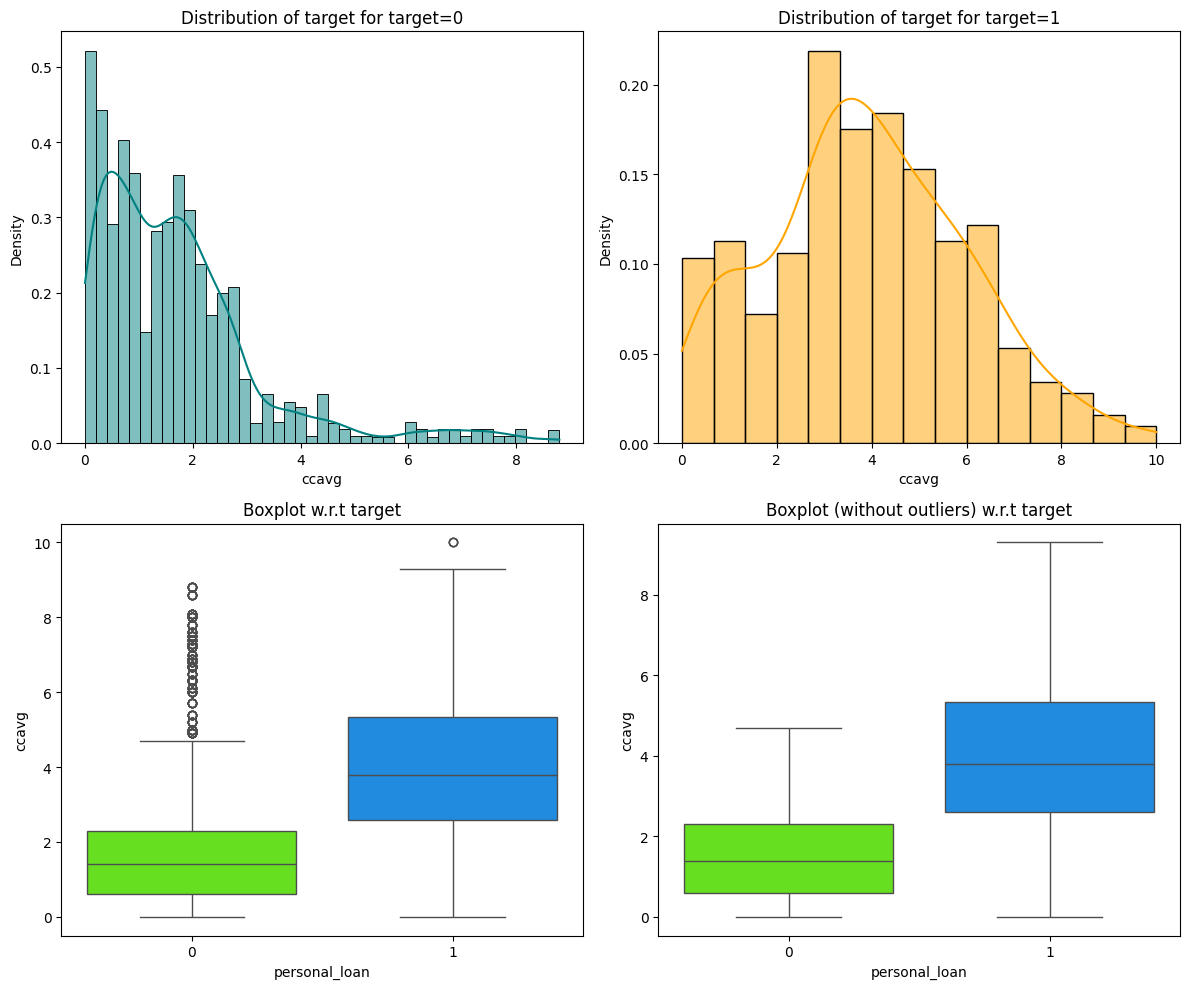

In [57]:
create_distribution_plot_wrt_target(loan_data, "ccavg", "personal_loan")

#### Observations <br>
* The mean value of CCAvg of customers who did not accept a personal loan is approximately \\$1600 and the mean value of customers who did accept a personal loan of approximately \\$4000.
* Thus, customers who have accepted a personal loan spend more money (on credit cards) every month.

### personal_loan vs mortgage

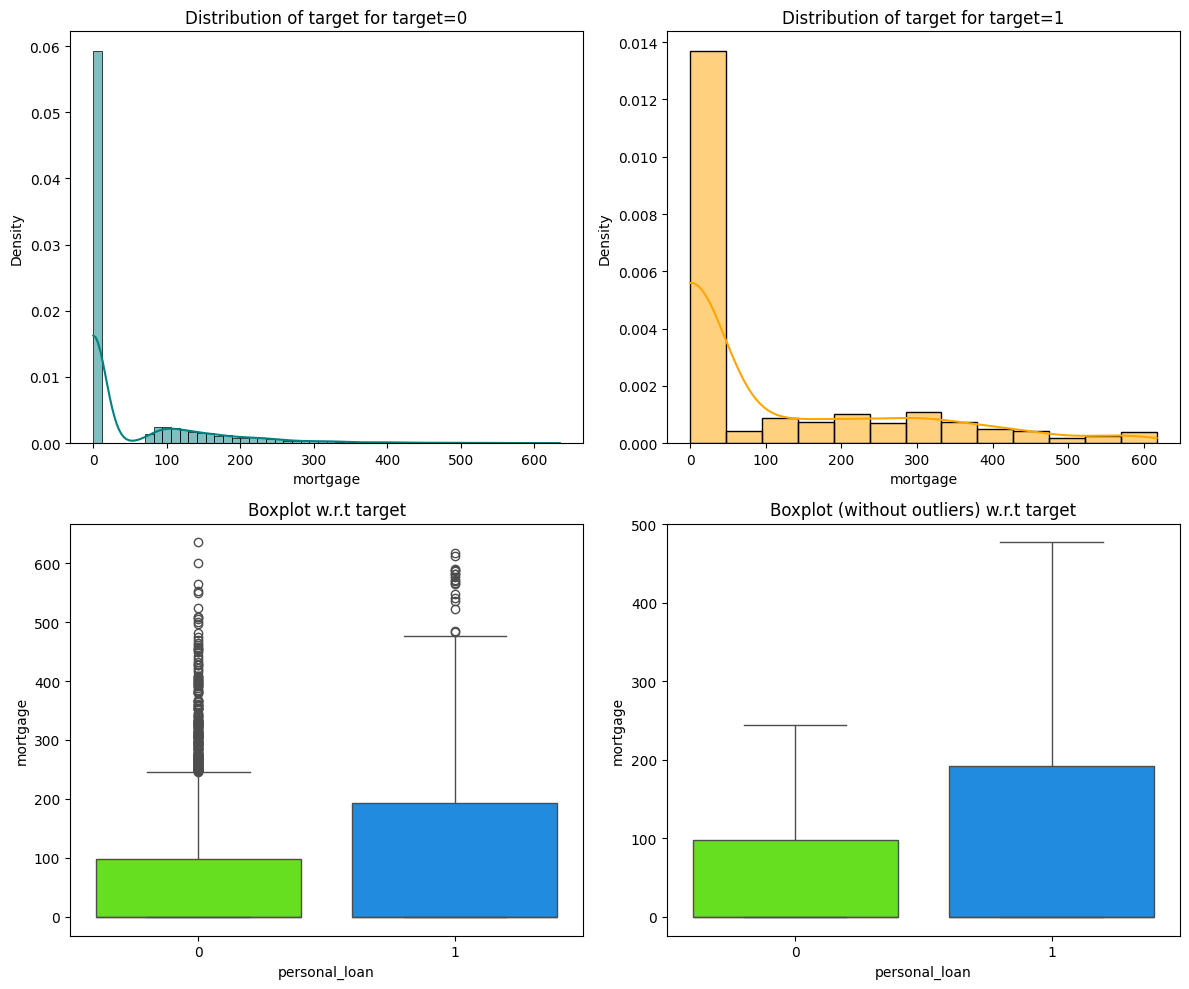

In [58]:
create_distribution_plot_wrt_target(loan_data, "mortgage", "personal_loan")

#### Observations <br>
* The mean value of a mortgage held by those who did not accept a personal loan is approximately \\$150000 and the mean value of those who did accept a personal loan is \\$290000.
* The difference in the mortgage values of those who accepted is almost double that of the ones who did not.
* Thus, as the mortgage value increase, the customer is more likely to accept a personal loan.

## Data Preprocessing

In [59]:
#Dropping columns which wont help us (as documented above in the univariate and bivariate analysis)
loan_data.drop(columns=['experience', 'zipcode', 'age'], inplace=True)

In [60]:
#Look at the data again
loan_data.describe(include='all').T

count       mean         std  min   25%   50%    75%  \
income              5000.0  73.774200   46.033729  8.0  39.0  64.0   98.0   
family              5000.0   2.396400    1.147663  1.0   1.0   2.0    3.0   
ccavg               5000.0   1.937938    1.747659  0.0   0.7   1.5    2.5   
education           5000.0   1.881000    0.839869  1.0   1.0   2.0    3.0   
mortgage            5000.0  56.498800  101.713802  0.0   0.0   0.0  101.0   
personal_loan       5000.0   0.096000    0.294621  0.0   0.0   0.0    0.0   
securities_account  5000.0   0.104400    0.305809  0.0   0.0   0.0    0.0   
cd_account          5000.0   0.060400    0.238250  0.0   0.0   0.0    0.0   
online              5000.0   0.596800    0.490589  0.0   0.0   1.0    1.0   
credit_card         5000.0   0.294000    0.455637  0.0   0.0   0.0    1.0   

                      max  
income              224.0  
family                4.0  
ccavg                10.0  
education             3.0  
mortgage            635.0  
personal_loan         1.0  
securities_account    1.0  
cd_account            1.0  
online                1.0  
credit_card           1.0

In [61]:
X = loan_data.drop(['personal_loan'], axis=1)
y = loan_data['personal_loan']

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 6)

In [62]:
print('Shape of the training set : ',X_train.shape )
print('Shape of the test set : ',X_test.shape )
print('Percentage of classes in the training set:\n',y_train.value_counts(normalize=True)*100)
print('Percentage of classes in the test set:\n',y_test.value_counts(normalize=True)*100)


Shape of the training set :  (3500, 9)
Shape of the test set :  (1500, 9)
Percentage of classes in the training set:
 0    90.342857
1     9.657143
Name: personal_loan, dtype: float64
Percentage of classes in the test set:
 0    90.533333
1     9.466667
Name: personal_loan, dtype: float64


## Model Building

### Model Evaluation Criterion

Since AllLife Bank is primarily interested in finding customers that are likely to take a personal loan, we should focus on avoiding incorrectly identifying customers who would accept a loan as one who would not. Or in other words, we want to reduce false negatives so we offer loans to everyone we predict would accept one. 

A model that satifies this will prevent us from offering loans to those who wouldn't be likely to take the loan, rather than predicting a customer who would accept a loan as one who would not (false positive).

To that end, we will use a Decision tree to predict which customers would accept a personal loan with focus on True positives and reducing false negatives.  Recall will need to be high, while accuracy, precision and F1 will not be a primary focus. We will also plot the importance of the variables used and confusion matrices to assess performance.

### Build Decision Tree Model

Since the frequency of class 1 is ~10% (those that took the loan) and the frequency of class 0 is ~90% (those who did not take the loan), then the class 0 will become the dominant class and the decision tree will become biased toward the class 0. Therefore, I will use a class_weight={0:0.096571, 1:0.903429} to adjust weights according to the proportion of each class frequency.  I could have used balanced to do a similar thing, but I decided to manually weight it.

In [63]:
y_train.value_counts(normalize=True)

0    0.903429
1    0.096571
Name: personal_loan, dtype: float64

In [64]:
base_model = DecisionTreeClassifier(criterion='gini', class_weight={0:0.096571, 1:0.903429},
                               random_state=1)

In [65]:
base_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.096571, 1: 0.903429}, random_state=1)

### Checking model performance on training data

In [66]:
## Function to create a confusion matrix
def make_confusion_matrix(base_model,  y_actual, labels=[1, 0], xtest=X_test):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    """
    y_predict = base_model.predict(xtest)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["Actual - No","Actual - Yes"], 
                         columns=['Predicted - No','Predicted - Yes'])
    #print(df_cm)
    #print("="*80)
    
    group_counts = [f"{value:0.0f}" for value in cm.flatten()]   
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{gc}\n{gp}" for gc, gp in zip(group_counts, group_percentages)]  
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize = (10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14);

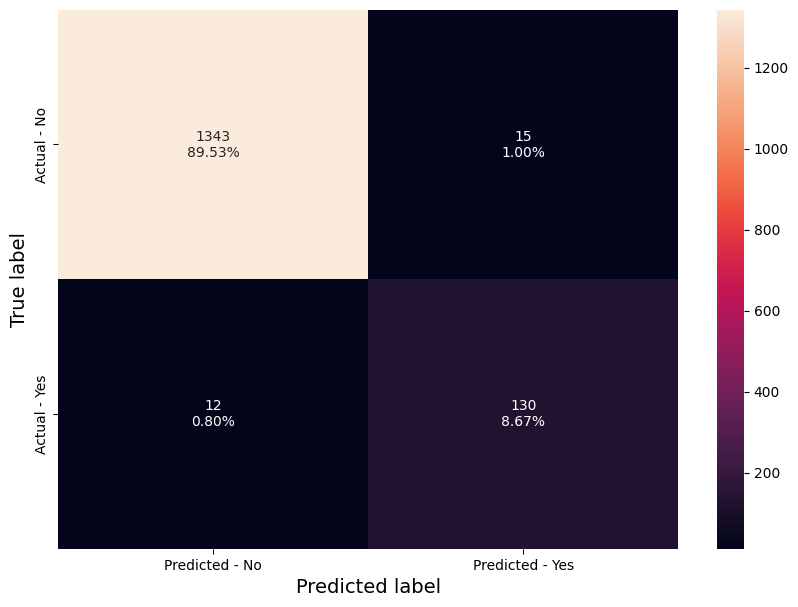

In [67]:
make_confusion_matrix(base_model, y_test)

In [68]:
##  Function to calculate recall score and others
def get_scores(model):
    '''
    Prints the various scores from model
    model : classifier to predict values of X
    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    print("recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("recall on test set : ", metrics.recall_score(y_test, pred_test))
    print("-----------------------------------------------------")
    print("accuracy on training set : ", metrics.accuracy_score(y_train, pred_train))
    print("accuracy on test set : ", metrics.accuracy_score(y_test, pred_test))
    print("-----------------------------------------------------")
    print("precision on training set : ", metrics.precision_score(y_train, pred_train))
    print("precision on test set : ", metrics.precision_score(y_test, pred_test))
    print("-----------------------------------------------------")
    print("f1 on training set : ", metrics.f1_score(y_train, pred_train))
    print("f1 on test set : ", metrics.f1_score(y_test, pred_test))

In [69]:
##  Function to calculate recall score only
def get_recall_score(model):
    '''
    Prints the various scores from model
    model : classifier to predict values of X
    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    print("recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("recall on test set : ", metrics.recall_score(y_test, pred_test))

### Recall score from base model.

In [70]:
# Recall, etc on train and test
get_scores(base_model)

recall on training set :  1.0
recall on test set :  0.9154929577464789
-----------------------------------------------------
accuracy on training set :  1.0
accuracy on test set :  0.982
-----------------------------------------------------
precision on training set :  1.0
precision on test set :  0.896551724137931
-----------------------------------------------------
f1 on training set :  1.0
f1 on test set :  0.9059233449477352


Our training set appears to be overfitted. We will need to adjust.

### Visualizing the decision tree from baseline model

In [71]:
feature_names = list(X.columns)
print(feature_names)

['income', 'family', 'ccavg', 'education', 'mortgage', 'securities_account', 'cd_account', 'online', 'credit_card']


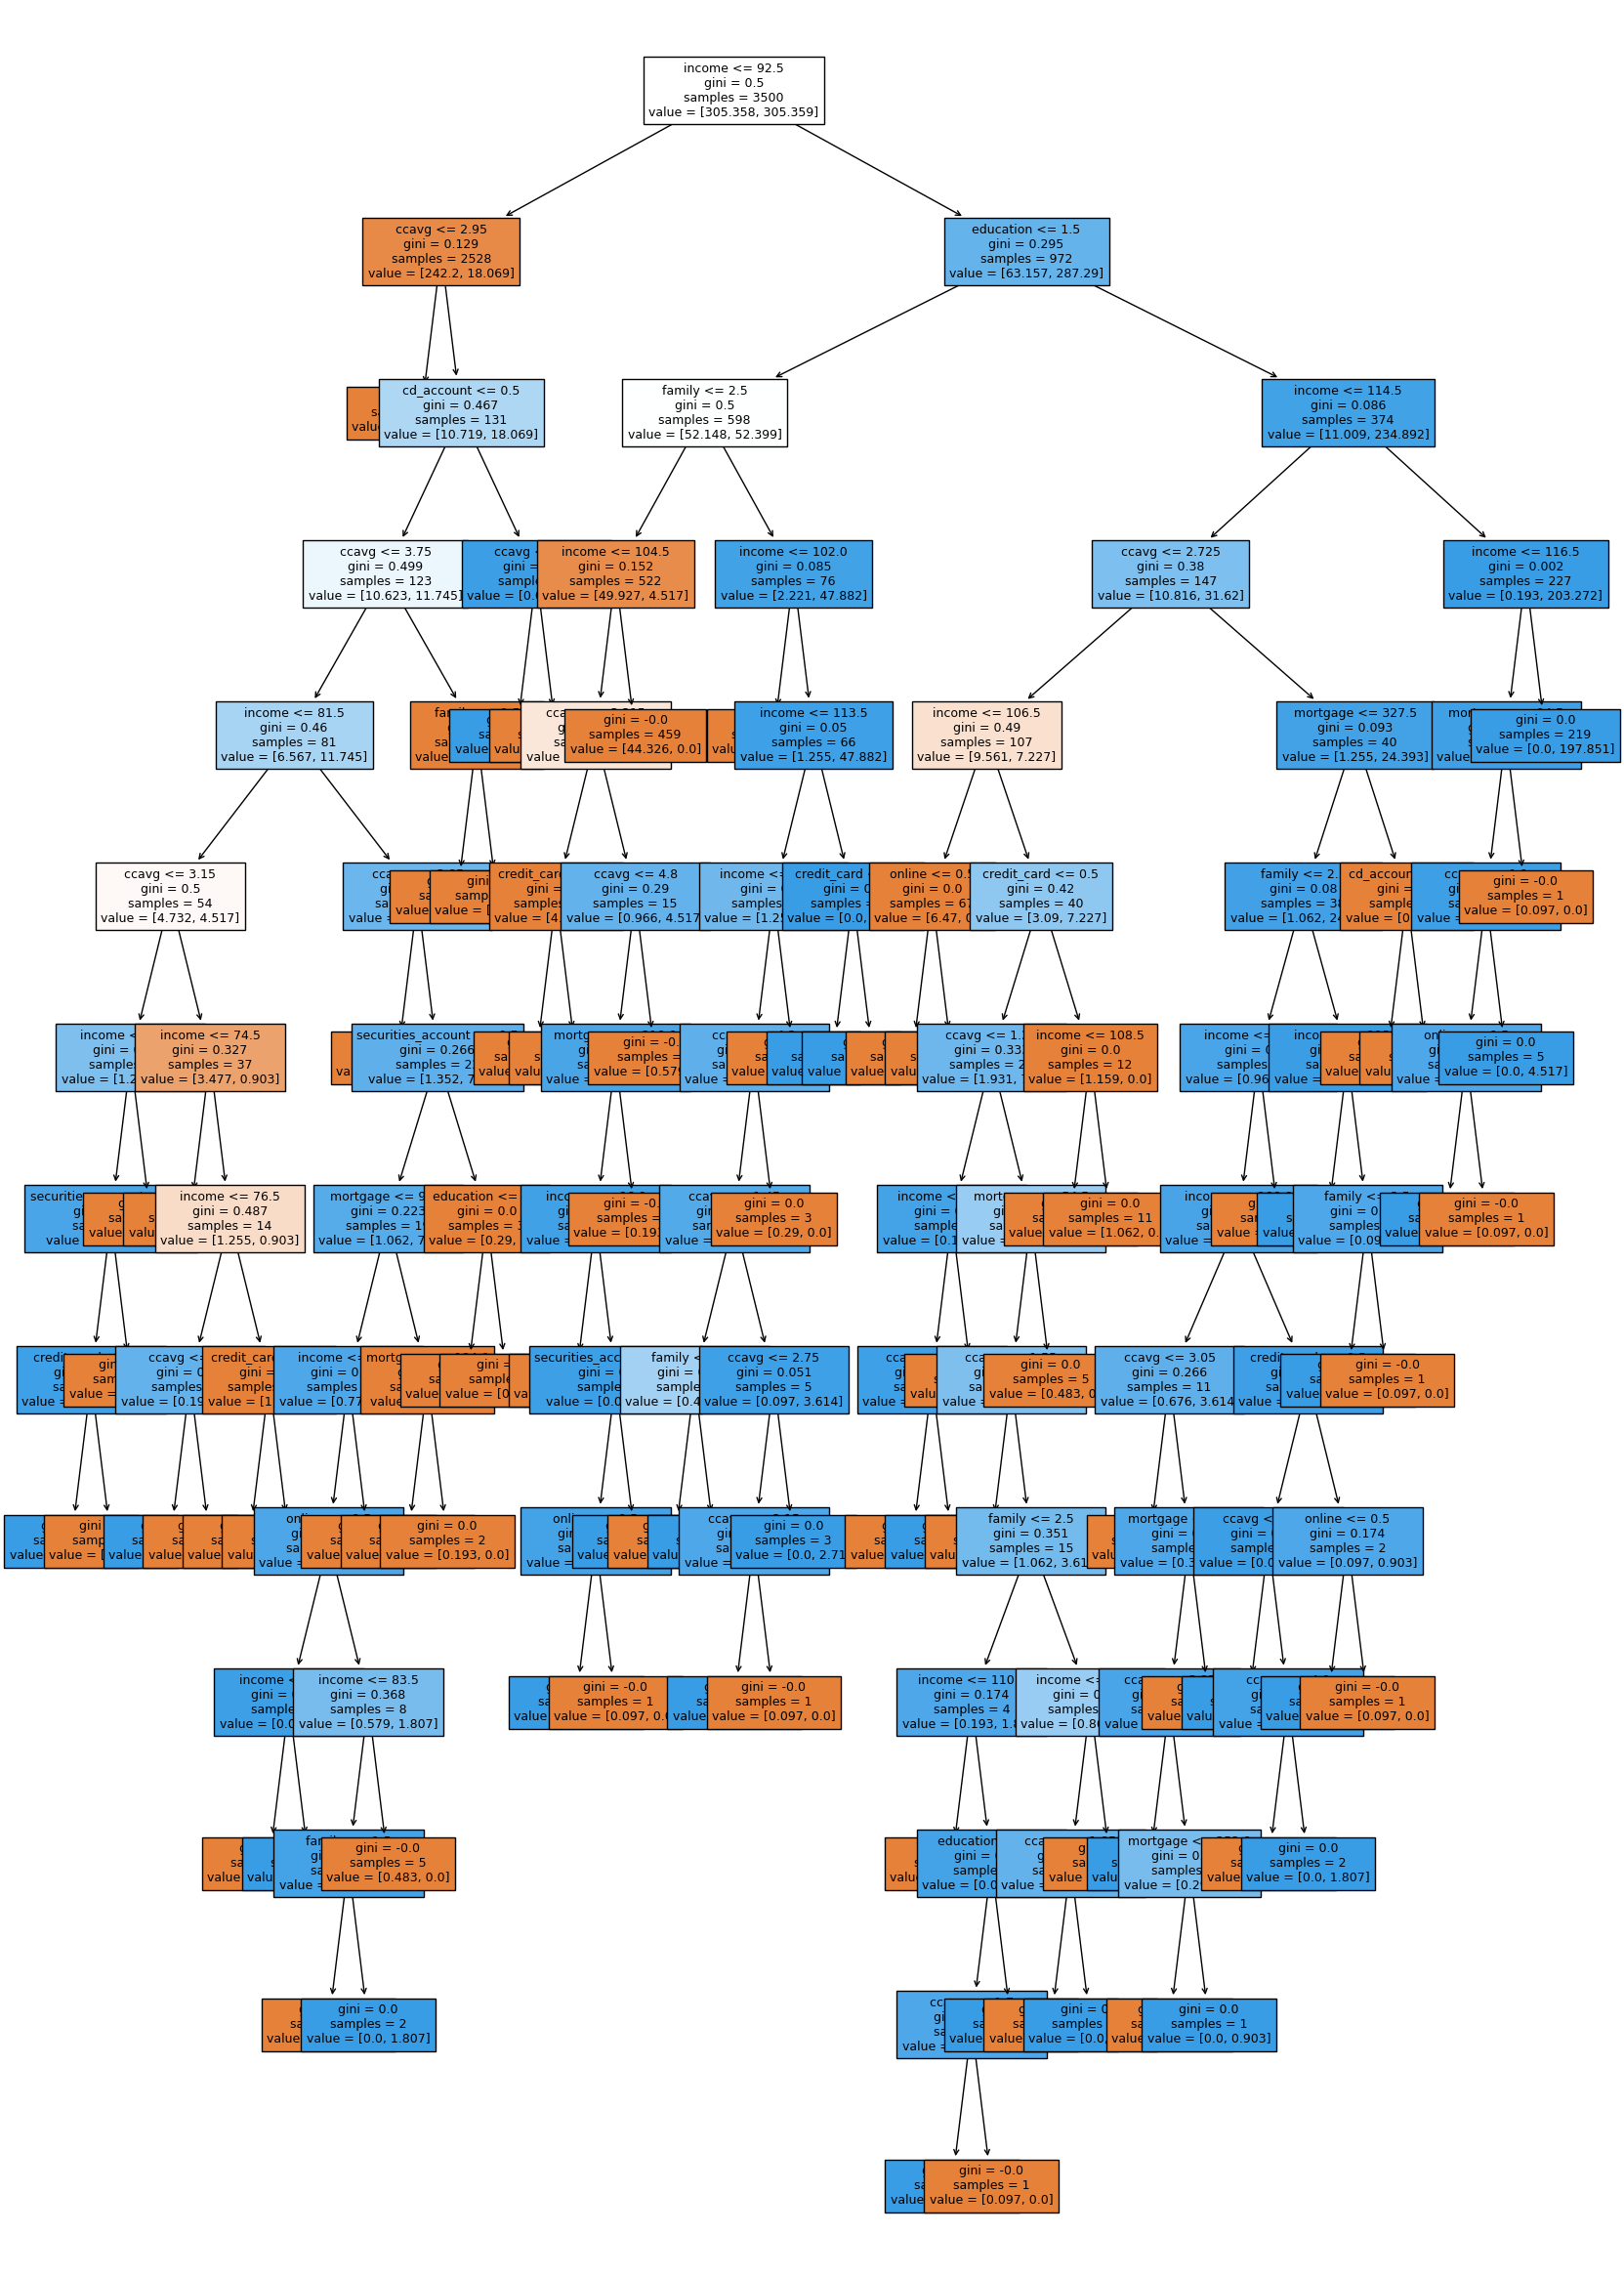

In [72]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(base_model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=9,
                     node_ids=False,
                     class_names=None,)

#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [73]:
# Text report showing the rules of a decision tree -
print(tree.export_text(base_model,feature_names=feature_names,show_weights=True))

|--- income <= 92.50
|   |--- ccavg <= 2.95
|   |   |--- weights: [231.48, 0.00] class: 0
|   |--- ccavg >  2.95
|   |   |--- cd_account <= 0.50
|   |   |   |--- ccavg <= 3.75
|   |   |   |   |--- income <= 81.50
|   |   |   |   |   |--- ccavg <= 3.15
|   |   |   |   |   |   |--- income <= 70.00
|   |   |   |   |   |   |   |--- securities_account <= 0.50
|   |   |   |   |   |   |   |   |--- credit_card <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 3.61] class: 1
|   |   |   |   |   |   |   |   |--- credit_card >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.10, 0.00] class: 0
|   |   |   |   |   |   |   |--- securities_account >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.19, 0.00] class: 0
|   |   |   |   |   |   |--- income >  70.00
|   |   |   |   |   |   |   |--- weights: [0.97, 0.00] class: 0
|   |   |   |   |   |--- ccavg >  3.15
|   |   |   |   |   |   |--- income <= 74.50
|   |   |   |   |   |   |   |--- weights: [2.22, 0.00] class: 0


### Feature importance from baseline model

In [74]:
def feature_importance_plot(model):
    """
    Displays feature importance barplot
    model: decision tree classifier
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)
    size = len(indices)//2 # to help scale the plot.
    
    plt.figure(figsize=(10, size))
    plt.title("Feature Importances", fontsize=14)
    plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance", fontsize=12);

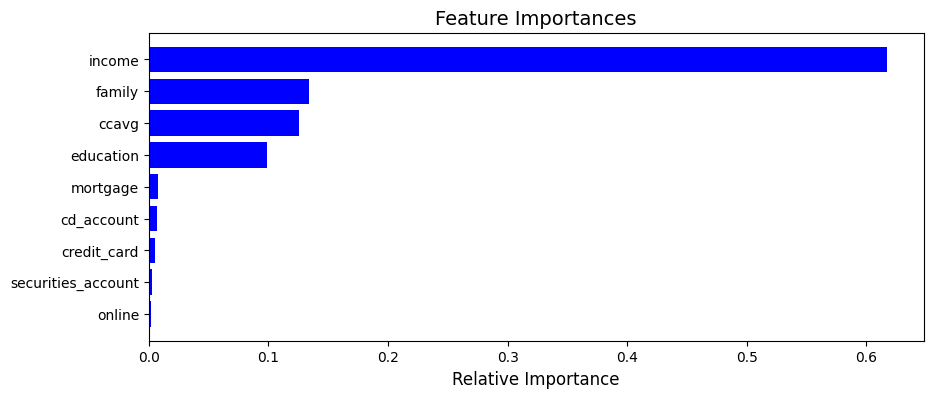

In [75]:
feature_importance_plot(base_model)

As we can see from this chart, income is the single highest predictor of accepting a loan, followed by family, ccavg and finally the education.

In [76]:
# Gini importance in tree building
pd.DataFrame(base_model.feature_importances_, 
                   columns=["Imp"], 
                   index=X_train.columns).sort_values(by='Imp', ascending=False)

Imp
income              0.616992
family              0.133971
ccavg               0.125433
education           0.099076
mortgage            0.007916
cd_account          0.006910
credit_card         0.004852
securities_account  0.002553
online              0.002297

## Model Performance Improvement

Now we will begin the improvement process. We will apply the same random_state to avoid any weirdness.

#### Pre-Pruning

In [77]:
pre_pruning_model = DecisionTreeClassifier(random_state=1, class_weight={0:0.096571, 1:0.903429})

# parameters to choose from
dtc_parameters = {'max_depth': np.arange(1,10),
              'criterion': ['entropy','gini'],
              'splitter': ['best','random'],
              'min_impurity_decrease': [0.000001,0.00001,0.0001],
              'max_features': ['log2','sqrt']}

# scoring
scoring = metrics.make_scorer(metrics.recall_score)

grid = GridSearchCV(pre_pruning_model, param_grid=dtc_parameters, scoring=scoring, cv=5)
grid = grid.fit(X_train, y_train)

# Set the clf to the best combination of parameters
pre_pruning_model = grid.best_estimator_

# Fit the best algorithm to the data. 
pre_pruning_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.096571, 1: 0.903429},
                       criterion='entropy', max_depth=8, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1,
                       splitter='random')

**Checking performance on training data**

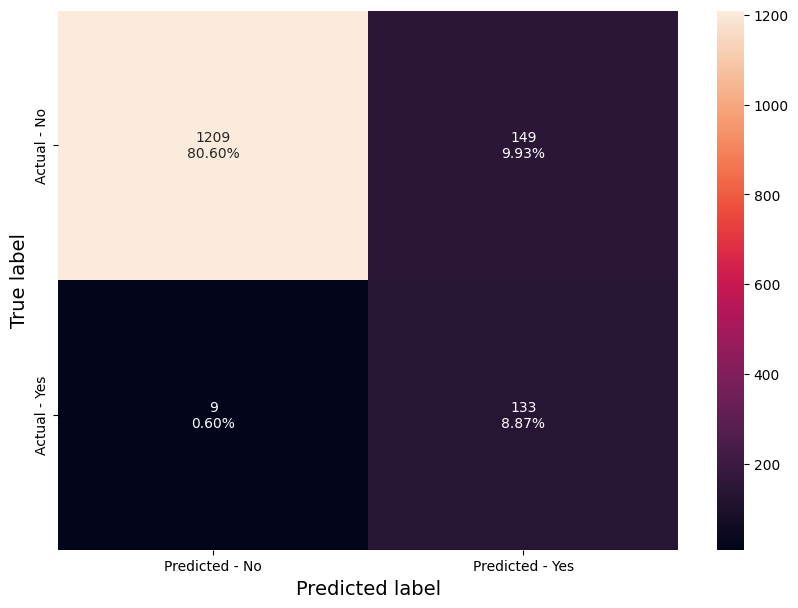

In [78]:
make_confusion_matrix(pre_pruning_model, y_test)

**Recall score using GridSearchCV**

In [79]:
get_scores(pre_pruning_model)

recall on training set :  0.9704142011834319
recall on test set :  0.9366197183098591
-----------------------------------------------------
accuracy on training set :  0.8954285714285715
accuracy on test set :  0.8946666666666667
-----------------------------------------------------
precision on training set :  0.47953216374269003
precision on test set :  0.4716312056737589
-----------------------------------------------------
f1 on training set :  0.6418786692759295
f1 on test set :  0.6273584905660377


Recall shows a slight reduction in overfitting of the training set and a increase in the test set.  Better but we need to explore tuning further.

**Visualizing the decision tree from the best fit estimator using GridSearchCV**

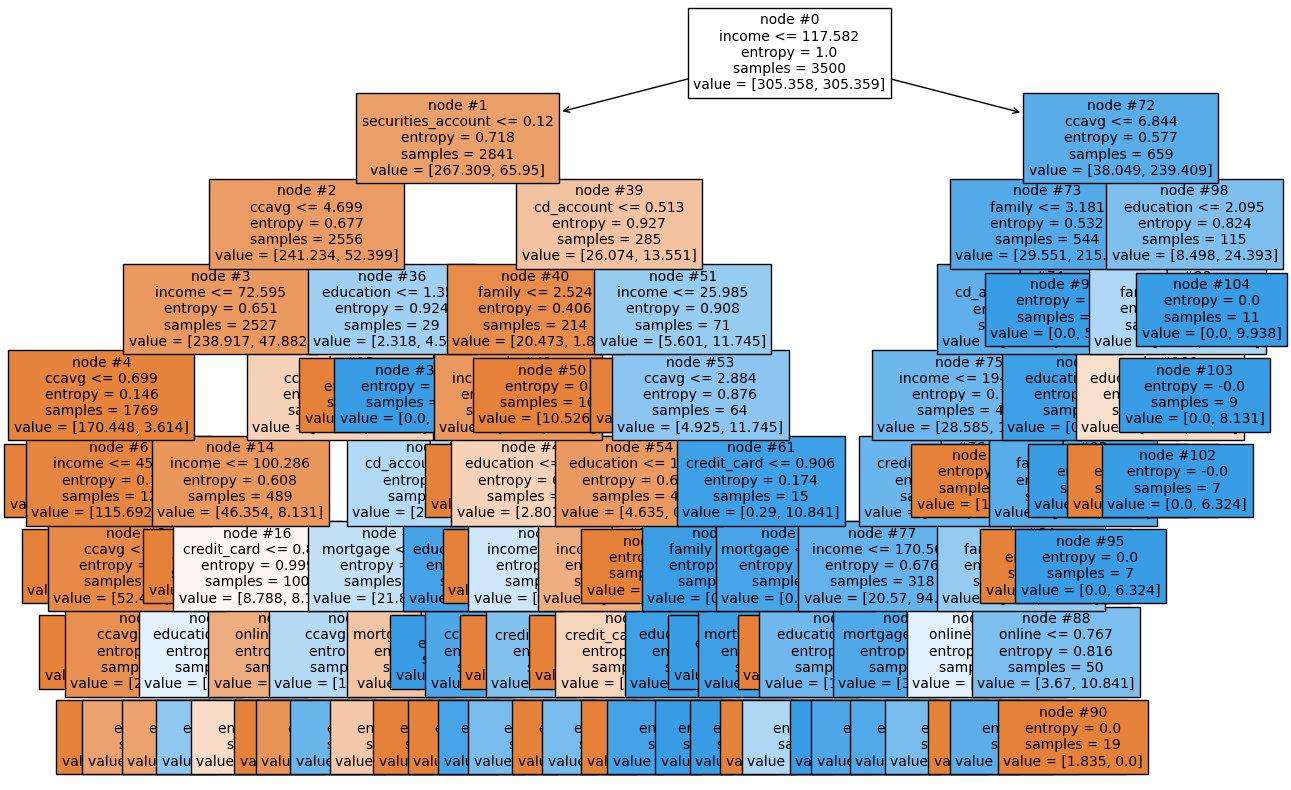

In [80]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(pre_pruning_model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=10,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [81]:
# Text report showing the rules of a decision tree -
print(tree.export_text(pre_pruning_model,
                       feature_names=feature_names,
                       show_weights=True))

|--- income <= 117.58
|   |--- securities_account <= 0.12
|   |   |--- ccavg <= 4.70
|   |   |   |--- income <= 72.59
|   |   |   |   |--- ccavg <= 0.70
|   |   |   |   |   |--- weights: [54.76, 0.00] class: 0
|   |   |   |   |--- ccavg >  0.70
|   |   |   |   |   |--- income <= 45.21
|   |   |   |   |   |   |--- weights: [63.25, 0.00] class: 0
|   |   |   |   |   |--- income >  45.21
|   |   |   |   |   |   |--- ccavg <= 1.82
|   |   |   |   |   |   |   |--- weights: [24.43, 0.00] class: 0
|   |   |   |   |   |   |--- ccavg >  1.82
|   |   |   |   |   |   |   |--- ccavg <= 2.37
|   |   |   |   |   |   |   |   |--- weights: [14.39, 0.00] class: 0
|   |   |   |   |   |   |   |--- ccavg >  2.37
|   |   |   |   |   |   |   |   |--- weights: [13.62, 3.61] class: 0
|   |   |   |--- income >  72.59
|   |   |   |   |--- ccavg <= 2.35
|   |   |   |   |   |--- income <= 100.29
|   |   |   |   |   |   |--- weights: [37.57, 0.00] class: 0
|   |   |   |   |   |--- income >  100.29
|   |   |   |   

### Feature importance using GridSearchCV

In [82]:
# Gini importance in tree building
pd.DataFrame(pre_pruning_model.feature_importances_, 
             columns=["Imp"],
             index=X_train.columns).sort_values(by='Imp', ascending=False)
#Here we will see that importance of features has increased

Imp
income              0.624565
ccavg               0.127750
education           0.105334
family              0.056601
cd_account          0.048587
online              0.016777
securities_account  0.007988
credit_card         0.007838
mortgage            0.004560

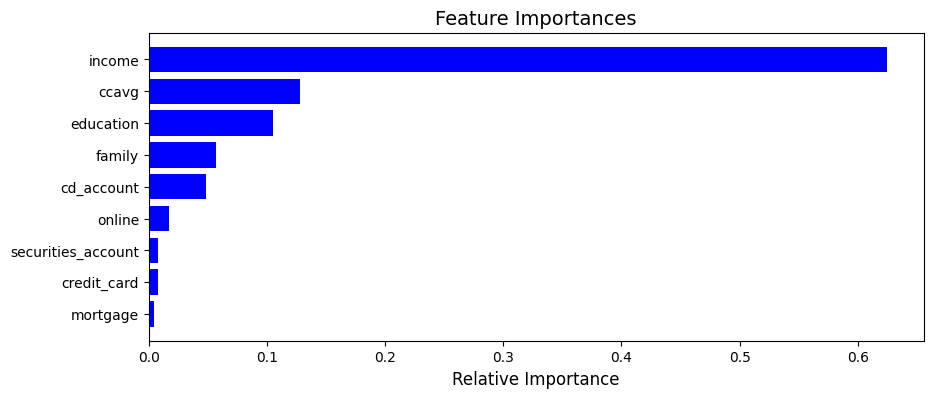

In [83]:
feature_importance_plot(pre_pruning_model)

In this model we see income becomes the most important factor by a larger margin.

### Cost Complexity Pruning

We will use the cost complexity pruning method to selectively trim our decision tree to reduce complexity (increase generalization) and further reduce overfitting. This will allow us to see the alpha values and corresponding impurity, which we will then graph to see the relationship.

In [84]:
clf = DecisionTreeClassifier(random_state=1,class_weight={0:0.096571, 1:0.903429})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [85]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -2.703011e-15
1   7.724493e-19 -2.702238e-15
2   5.793370e-18 -2.696445e-15
3   5.828481e-18 -2.690616e-15
4   8.690055e-18 -2.681926e-15
5   2.364978e-17 -2.658277e-15
6   3.476022e-17 -2.623516e-15
7   4.424028e-17 -2.579276e-15
8   4.704918e-17 -2.532227e-15
9   5.561635e-17 -2.476611e-15
10  1.501047e-04  3.002095e-04
11  1.540117e-04  6.082328e-04
12  1.544583e-04  1.226066e-03
13  1.548176e-04  1.535701e-03
14  1.553595e-04  1.846420e-03
15  1.569292e-04  2.160279e-03
16  1.605950e-04  2.481469e-03
17  2.712180e-04  2.752687e-03
18  2.969388e-04  3.049625e-03
19  3.002095e-04  3.349835e-03
20  3.002095e-04  3.950254e-03
21  3.080233e-04  4.258277e-03
22  3.107191e-04  4.568996e-03
23  3.114980e-04  4.880494e-03
24  3.431333e-04  7.282428e-03
25  5.211039e-04  7.803532e-03
26  5.582604e-04  9.478313e-03
27  5.587890e-04  1.003710e-02
28  5.703236e-04  1.060743e-02
29  5.764455e-04  1.118387e-02
30  6.199635e-04  1.366372e-02
31  6.697789e-04  1.500328e-02
32  6.868882e-04  1.637706e-02
33  7.052110e-04  1.708227e-02
34  7.220681e-04  1.852641e-02
35  8.096299e-04  2.014567e-02
36  9.136180e-04  2.197290e-02
37  1.062379e-03  2.303528e-02
38  1.440157e-03  2.447544e-02
39  1.924727e-03  3.024962e-02
40  2.097791e-03  3.234741e-02
41  2.945128e-03  3.529254e-02
42  3.964192e-03  4.322092e-02
43  5.480037e-03  5.418100e-02
44  6.389971e-03  6.057097e-02
45  8.208965e-03  7.698890e-02
46  3.303090e-02  1.100198e-01
47  5.729992e-02  2.246196e-01
48  2.753804e-01  5.000000e-01

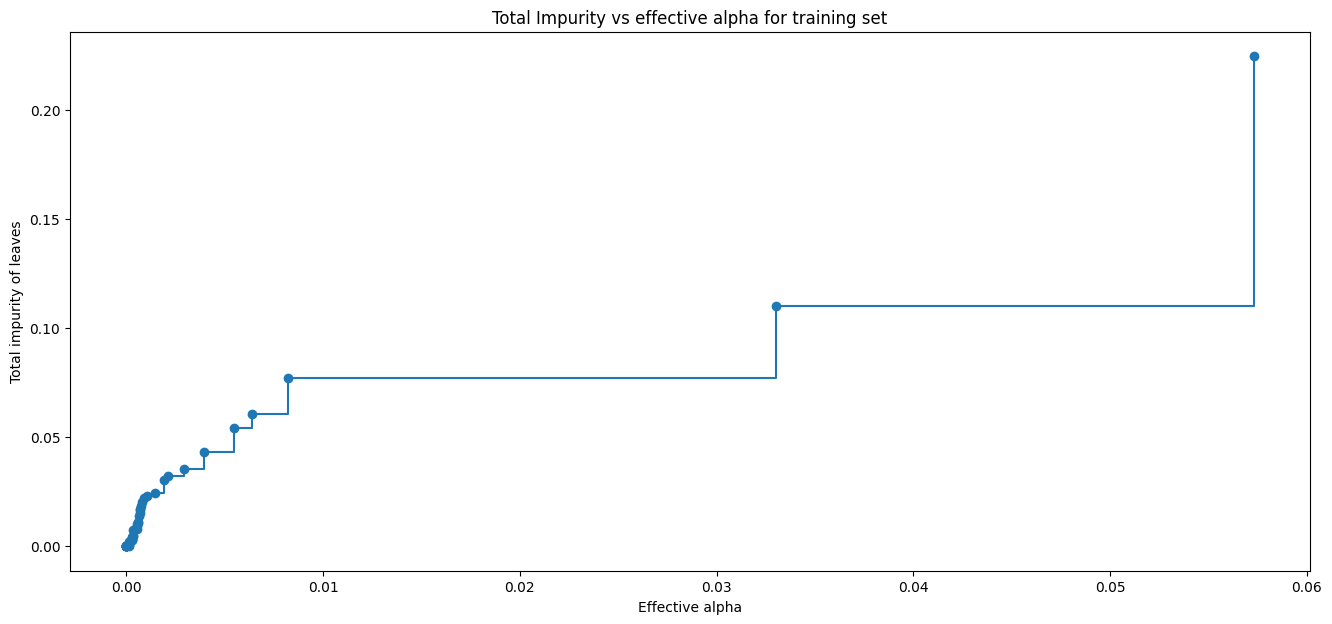

In [86]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [87]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, 
                                 ccp_alpha=ccp_alpha,
                                class_weight={0:0.096571, 1:0.903429})
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
print(f"Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}")

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2753803623354793


Now we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Then we graph that the number of nodes and tree depth to show the decrease as alpha increases.

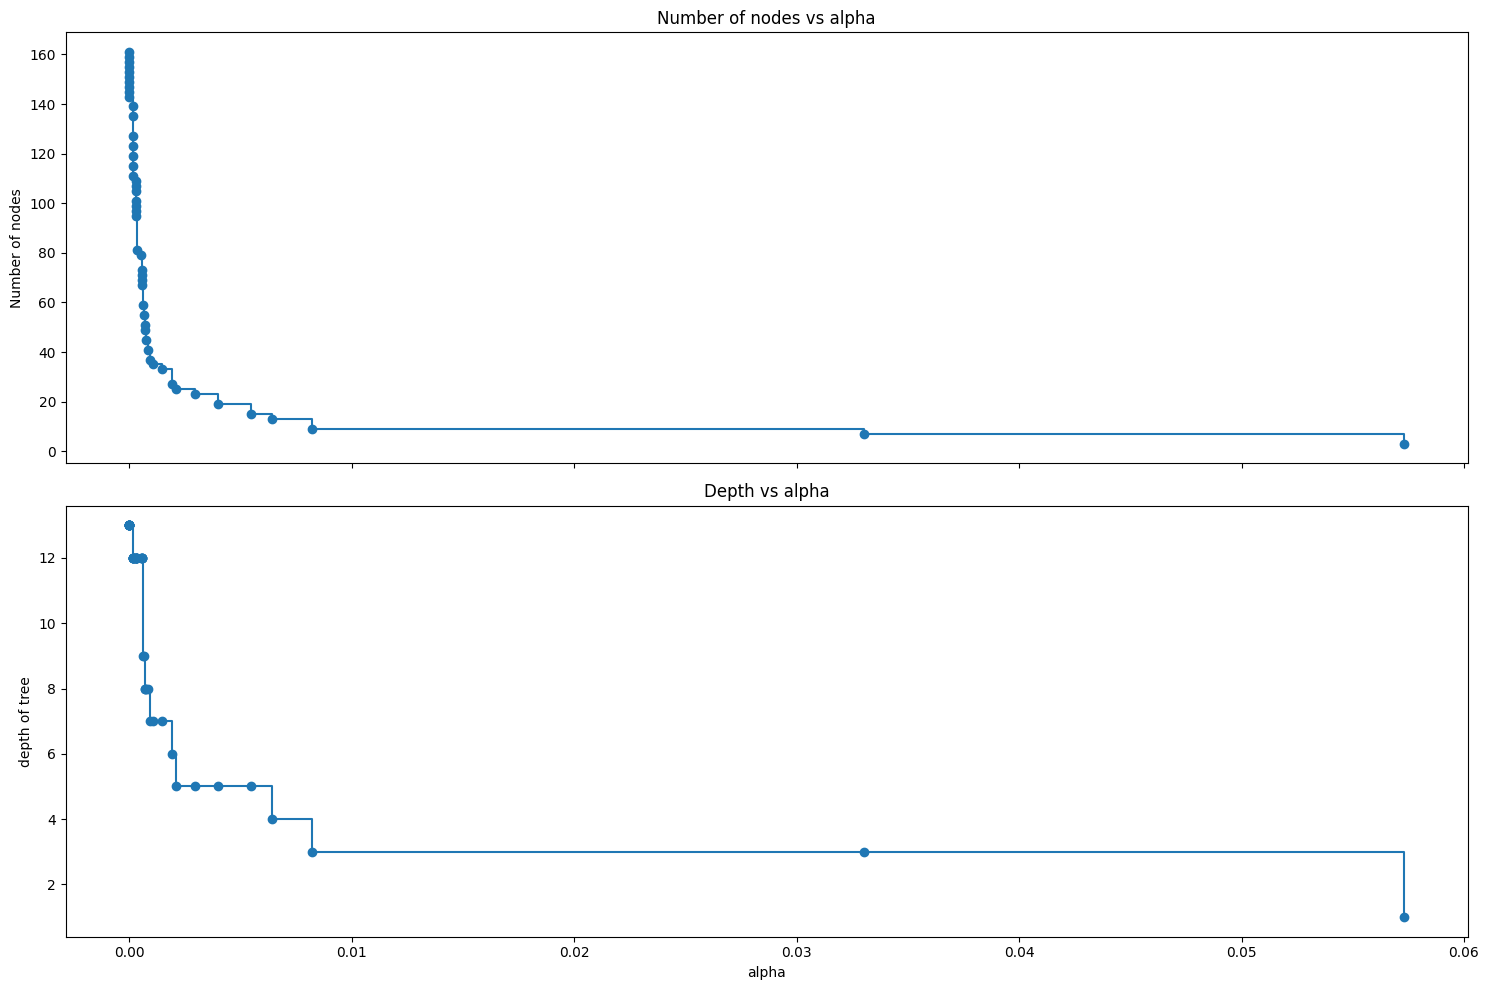

In [88]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [89]:
recall_train = []
for clf in clfs:
    prediction_train_3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, prediction_train_3)
    recall_train.append(values_train)

In [90]:
recall_test = []
for clf in clfs:
    prediction_test_3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, prediction_test_3)
    recall_test.append(values_test)

In [91]:
training_scores = [clf.score(X_train, y_train) for clf in clfs]
testing_scores = [clf.score(X_test, y_test) for clf in clfs]

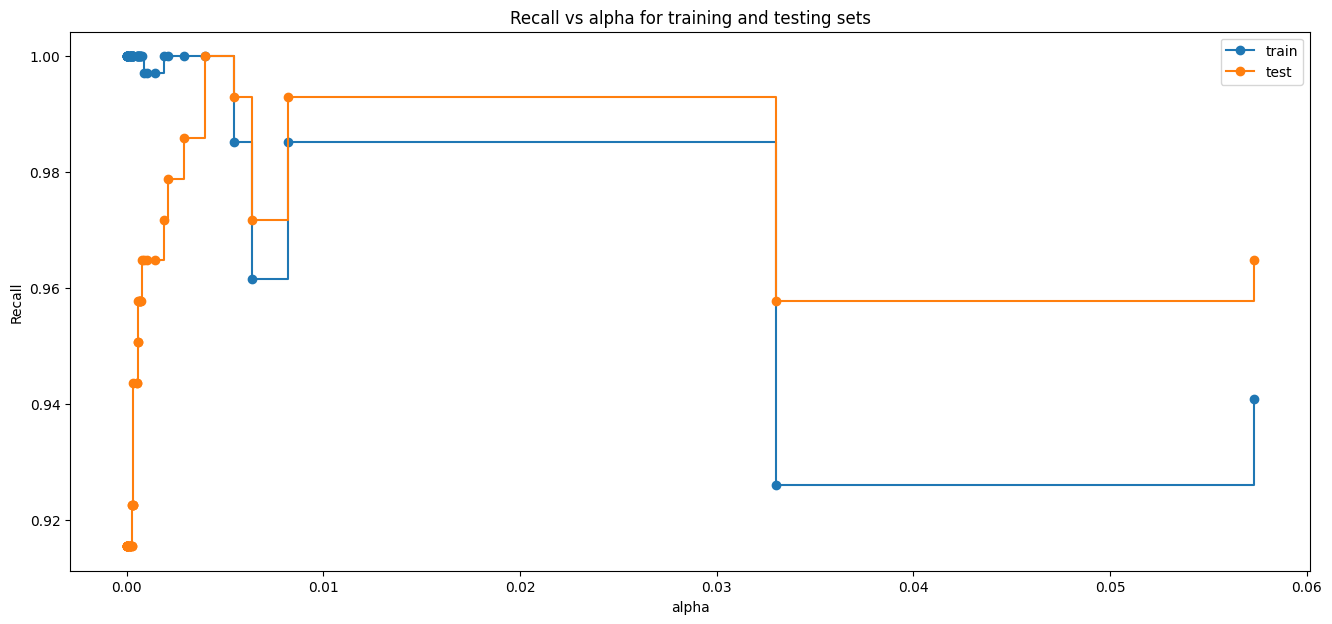

In [92]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, 
        recall_train, 
        marker='o',
        label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas,
        recall_test, 
        marker='o',
        label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

When ccp_alpha is set to zero in the DecisionTreeClassifier, the tree overfits on the training set and testing recall is less than 92%. Somewhere around .005 we see the highest recall for test and training, and as we continue increasing the alpha (pruning the tree), we see that the test and training recall both decrease due to overpruning and underfitting.
We will use the below code to extract the best ccp_alpha to use in our post-pruning model.

In [106]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.003964192120123286,
                       class_weight={0: 0.096571, 1: 0.903429}, random_state=1)


Therefore, in Post-Pruning we will use a ccp_alpha of 0.004

#### Post-Pruning

In [117]:
post_pruning_model = DecisionTreeClassifier(ccp_alpha=0.004,
                                     random_state=1,
                                           class_weight={0:0.096571, 1:0.903429})
post_pruning_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004, class_weight={0: 0.096571, 1: 0.903429},
                       random_state=1)

**Checking performance on training data**

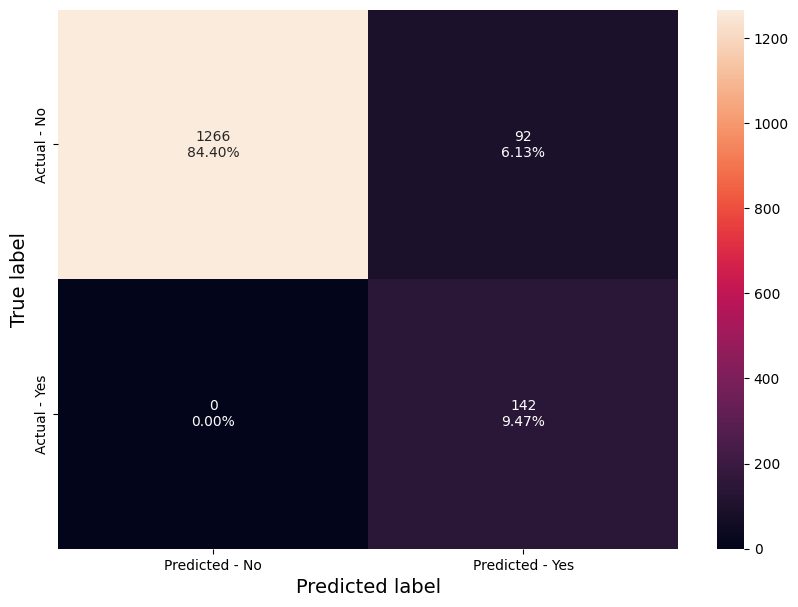

In [118]:
make_confusion_matrix(post_pruning_model, y_test)

In [119]:
get_scores(post_pruning_model)

recall on training set :  1.0
recall on test set :  1.0
-----------------------------------------------------
accuracy on training set :  0.9454285714285714
accuracy on test set :  0.9386666666666666
-----------------------------------------------------
precision on training set :  0.6389413988657845
precision on test set :  0.6068376068376068
-----------------------------------------------------
f1 on training set :  0.7797001153402539
f1 on test set :  0.7553191489361701


**Visualizing the Decision Tree**

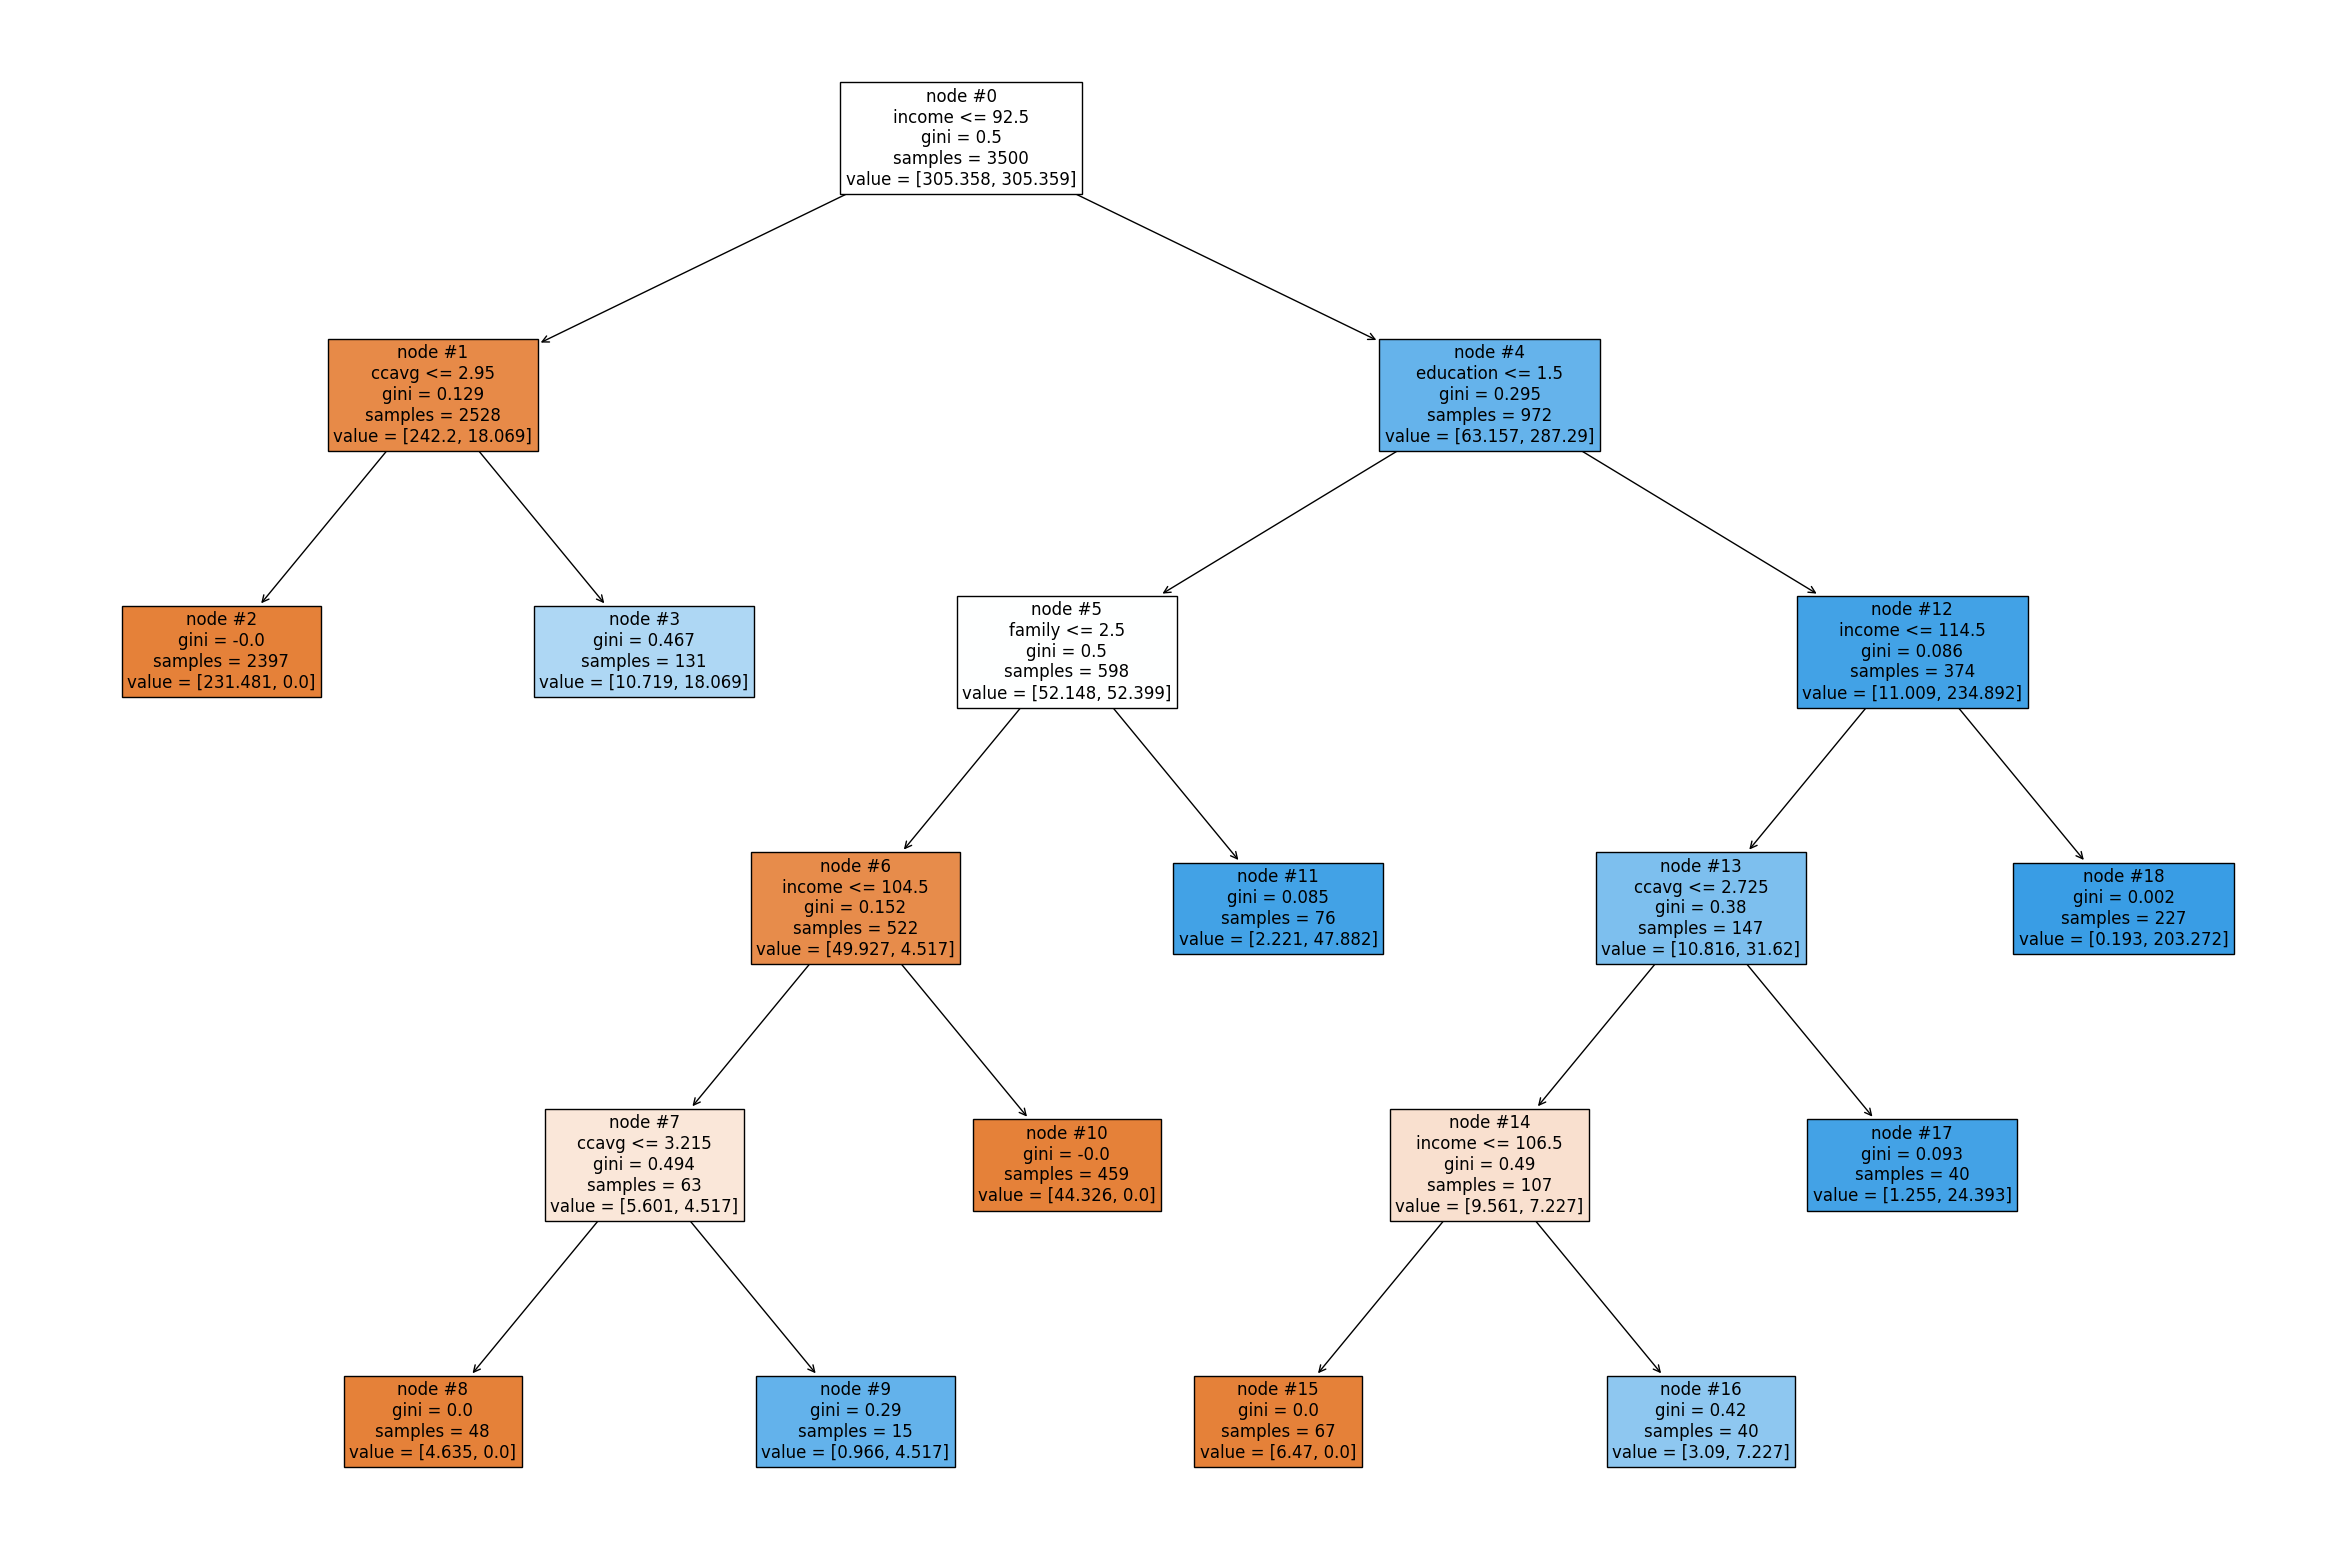

In [120]:
plt.figure(figsize=(30, 20))

out = tree.plot_tree(post_pruning_model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=12,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [121]:
print(tree.export_text(post_pruning_model, feature_names=feature_names, show_weights=True))

|--- income <= 92.50
|   |--- ccavg <= 2.95
|   |   |--- weights: [231.48, 0.00] class: 0
|   |--- ccavg >  2.95
|   |   |--- weights: [10.72, 18.07] class: 1
|--- income >  92.50
|   |--- education <= 1.50
|   |   |--- family <= 2.50
|   |   |   |--- income <= 104.50
|   |   |   |   |--- ccavg <= 3.21
|   |   |   |   |   |--- weights: [4.64, 0.00] class: 0
|   |   |   |   |--- ccavg >  3.21
|   |   |   |   |   |--- weights: [0.97, 4.52] class: 1
|   |   |   |--- income >  104.50
|   |   |   |   |--- weights: [44.33, 0.00] class: 0
|   |   |--- family >  2.50
|   |   |   |--- weights: [2.22, 47.88] class: 1
|   |--- education >  1.50
|   |   |--- income <= 114.50
|   |   |   |--- ccavg <= 2.73
|   |   |   |   |--- income <= 106.50
|   |   |   |   |   |--- weights: [6.47, 0.00] class: 0
|   |   |   |   |--- income >  106.50
|   |   |   |   |   |--- weights: [3.09, 7.23] class: 1
|   |   |   |--- ccavg >  2.73
|   |   |   |   |--- weights: [1.26, 24.39] class: 1
|   |   |--- income >  11

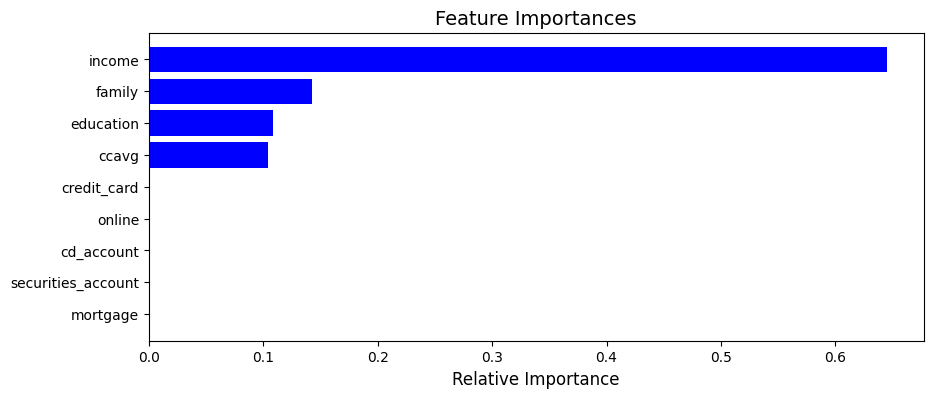

In [122]:
feature_importance_plot(post_pruning_model)

## Model Performance Comparison and Final Model Selection

In [123]:
get_recall_score(base_model)

recall on training set :  1.0
recall on test set :  0.9154929577464789


In [124]:
get_recall_score(pre_pruning_model)

recall on training set :  0.9704142011834319
recall on test set :  0.9366197183098591


In [125]:
get_recall_score(post_pruning_model)

recall on training set :  1.0
recall on test set :  1.0


In [116]:
comparison = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 
                                 'Train_Recall':[1, 0.97, 1], 
                                 'Test_Recall':[0.92, 0.94, 1]}) 
comparison

Model  Train_Recall  Test_Recall
0                Initial decision tree model          1.00         0.92
1  Decision treee with hyperparameter tuning          0.97         0.94
2            Decision tree with post-pruning          1.00         1.00

The decision tree with post-pruning gives the best recall (best model), achieving a 100% recall on both test and training data.

## Actionable Insights and Business Recommendations


### Observations
* Income, Family size, Education, and CCAvg were significant contributors to the classification process.
* We utilized decision trees for building our predictive model, and through the use of pre and post-pruning, as well as class weighting, we were able to achieve a 100% recall score on the dataset, which should allow AllLife to target the best set of customers for personal loans with high acceptance rate.

### Recommendations
* The data shows those customers with an income of less than $92.5K are less likely to accept a loan, so we recommend not targeting this group.
* The data further shows that there are 4 main groupings of customers that should be targeted:
    * High income (greater than \\$114.5K) with Advanced or graduate level education.
    * High income (greater than \\$106.5K but less than \\$114.5K), Advanced or graduate level education, and high (>\\$2.73K) to  medium (<\\$2.73K) monthly credit_card spending
    * Medium income (>\\$92.5K but less than \\$104.5K), undergraduate education, family size of 2 and high monthly credit_card spending (>\\$3.21K)
    * Lower income (>\\$92.5K) with monthly credit_card spending in excess of $2.95K or family size 3 or greater.

___

#### Appendix

#### Definitions
* accuracy - how many of our predictions were true
* precision - of our postive predictions, how many were true?
* recall - out of all the ones that should be true, how many did we correctly predict
* f1 - how effective we make the tradeoff between precision and recall